Appyling Rayda's Criterion for Spatial Anomaly  Detection and testing it on 10 test AIS input DATA from a  filtered Spatial CSV File


Columns in the dataset:
Index(['IMO', 'Original_LON', 'Original_LAT', 'Corrected_LON',
       'Corrected_LAT'],
      dtype='object')

Processing ship IMO: IMO0000001
Indices with deviations greater than allowed deviation (IMO: IMO0000001): []


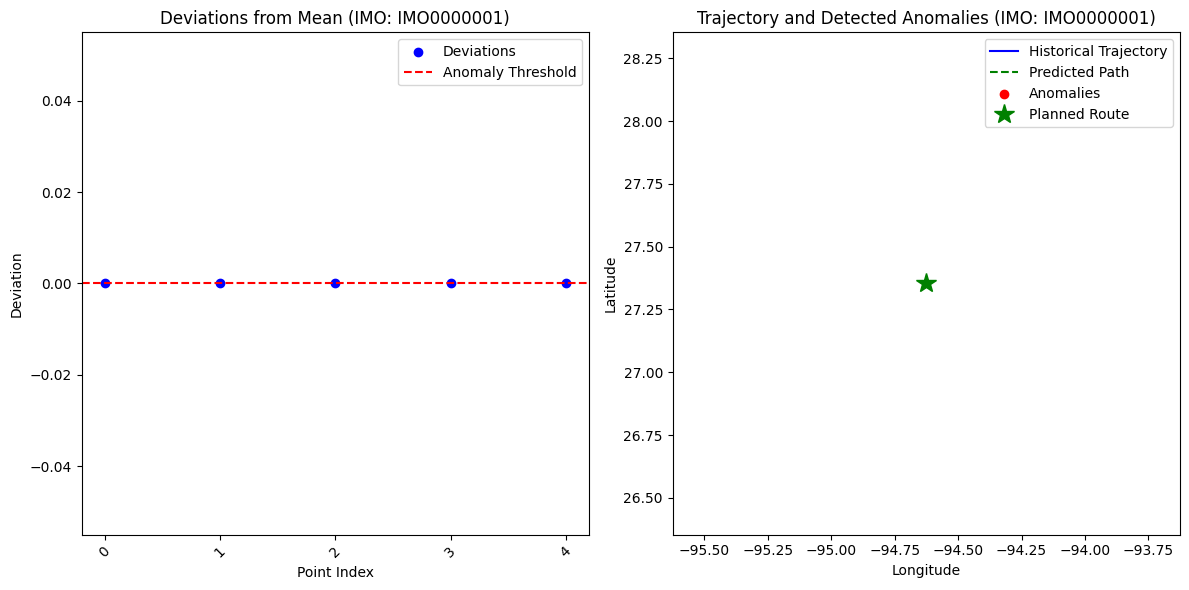

Total points: 5
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO0000002
Not enough data points for ship IMO IMO0000002. Skipping.

Processing ship IMO: IMO1035211
Indices with deviations greater than allowed deviation (IMO: IMO1035211): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


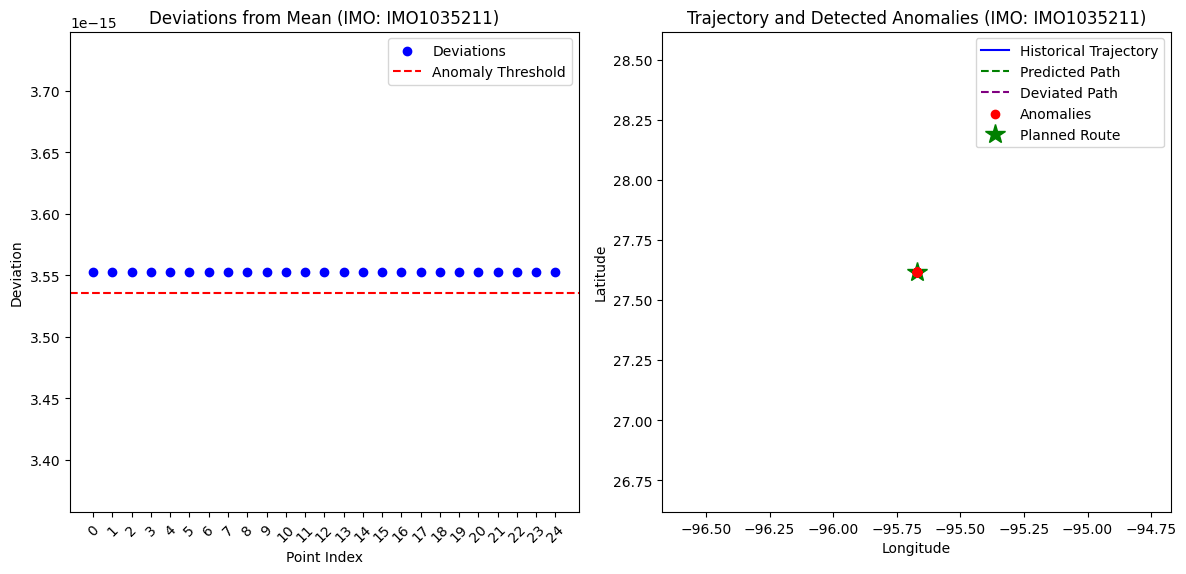

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing ship IMO: IMO1283991
Indices with deviations greater than allowed deviation (IMO: IMO1283991): []


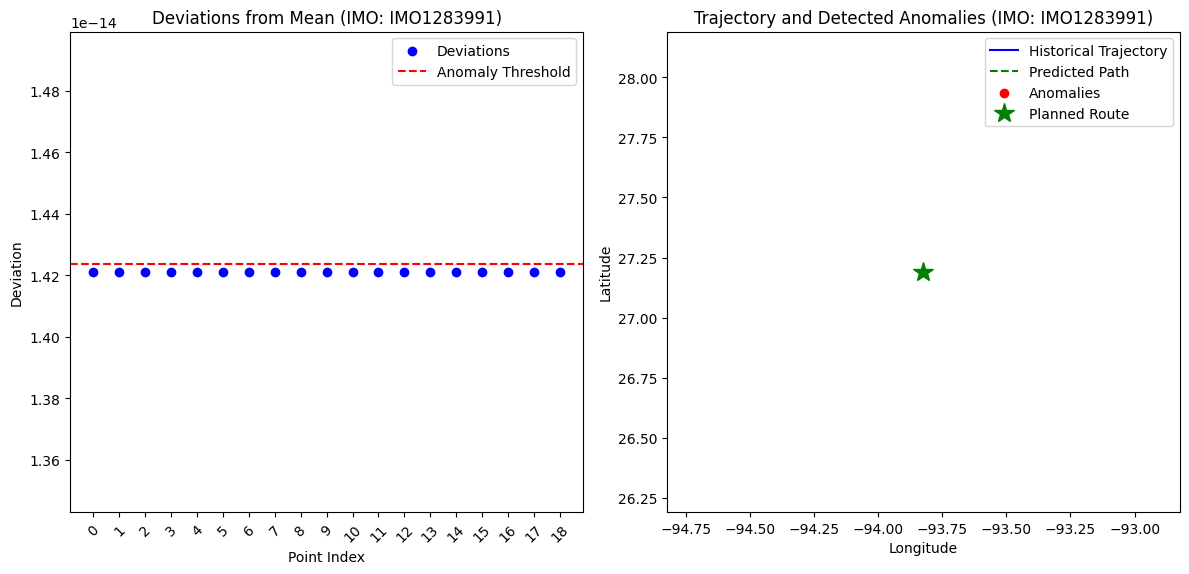

Total points: 19
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO1283994
Indices with deviations greater than allowed deviation (IMO: IMO1283994): []


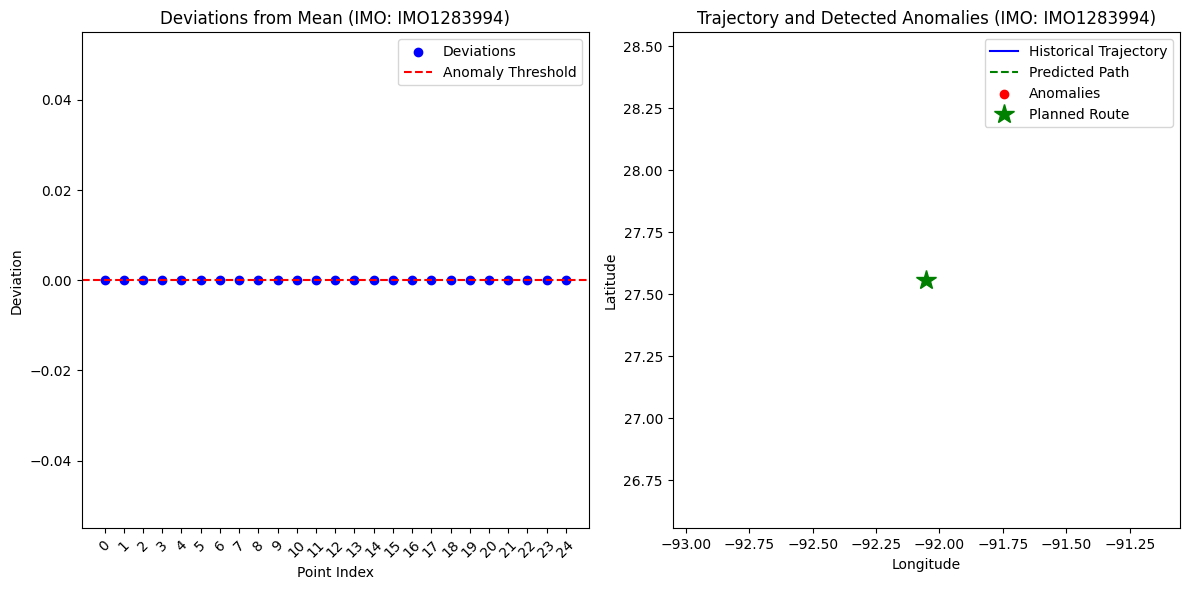

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO2345678
Indices with deviations greater than allowed deviation (IMO: IMO2345678): []


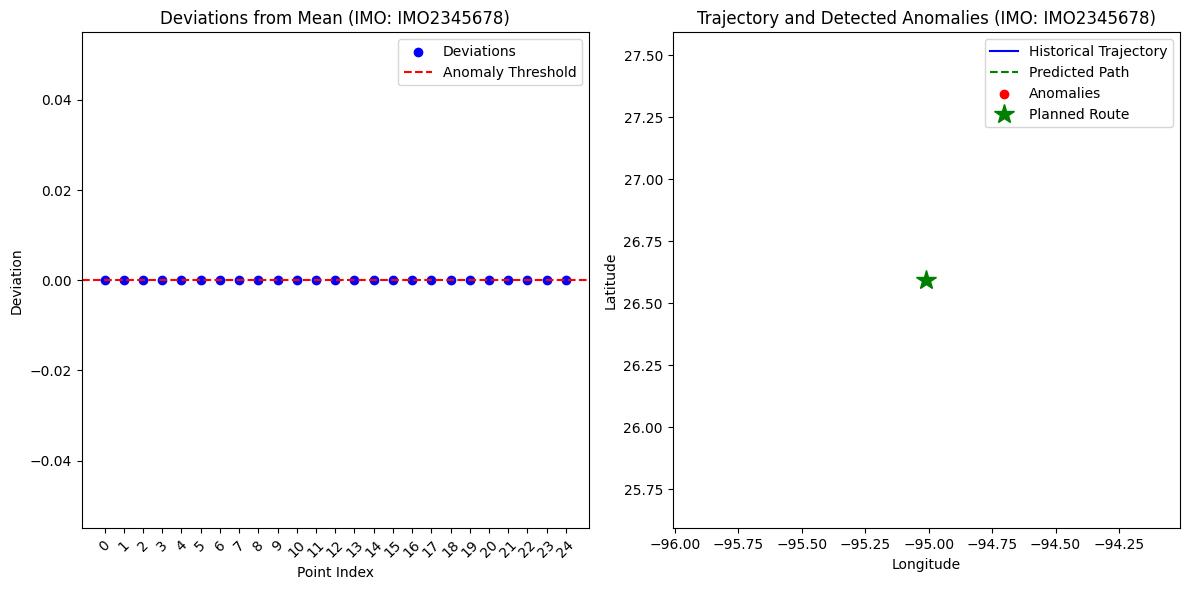

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO6604169
Indices with deviations greater than allowed deviation (IMO: IMO6604169): []


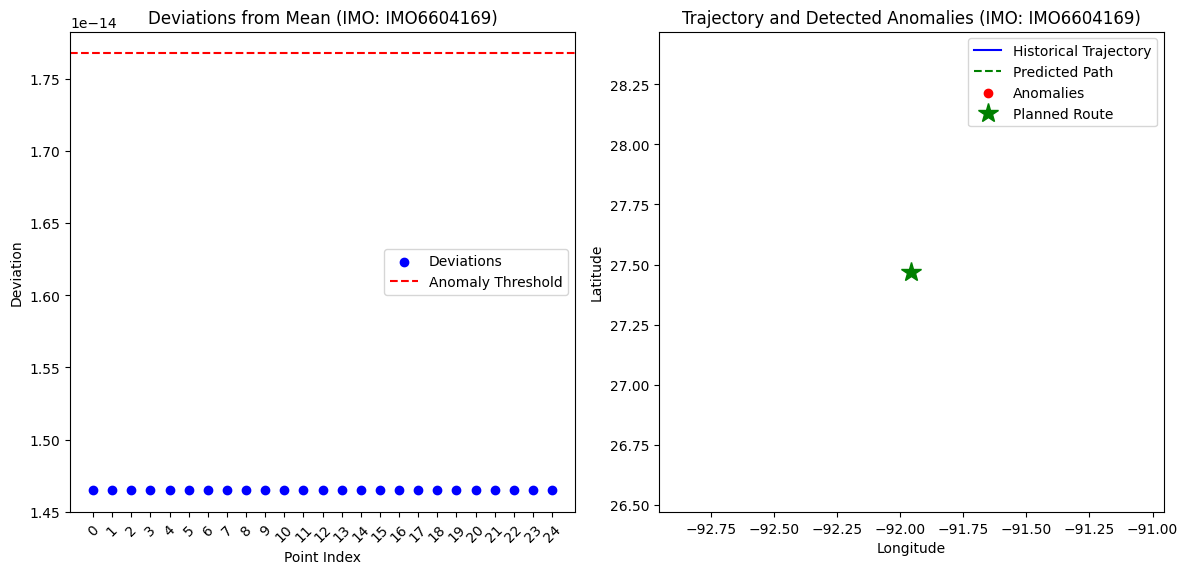

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO6621662
Indices with deviations greater than allowed deviation (IMO: IMO6621662): []


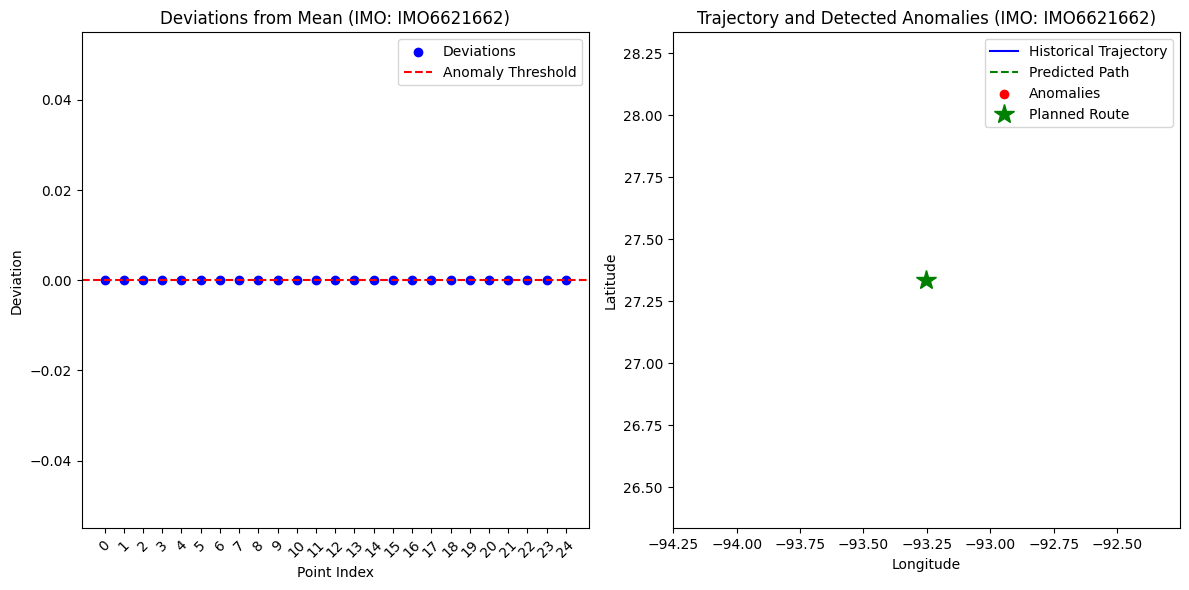

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO6728068
Indices with deviations greater than allowed deviation (IMO: IMO6728068): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


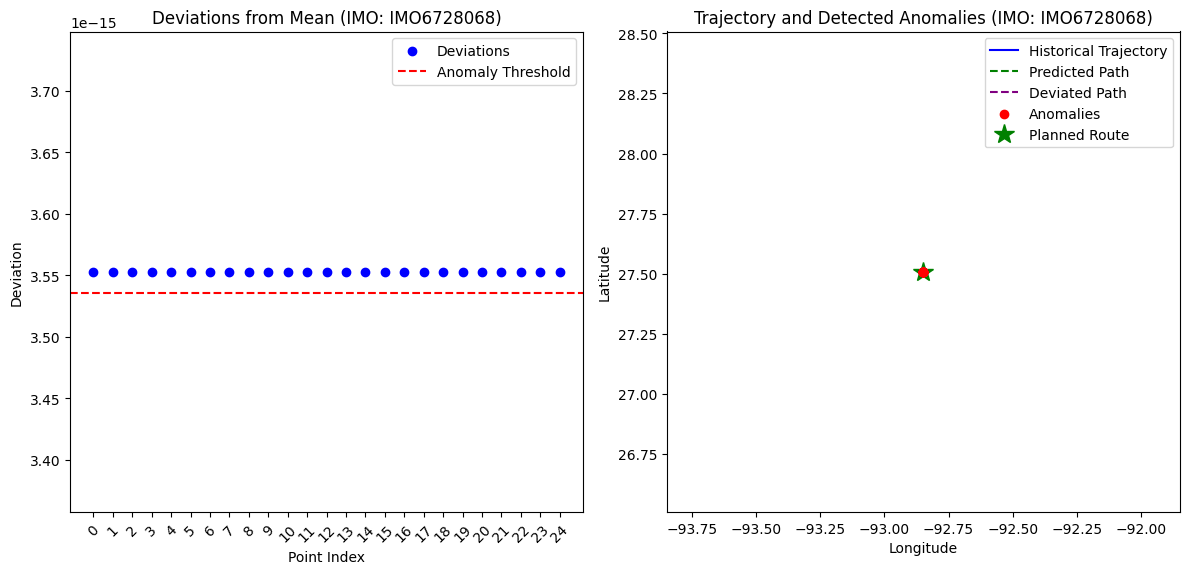

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing ship IMO: IMO7100445
Indices with deviations greater than allowed deviation (IMO: IMO7100445): []


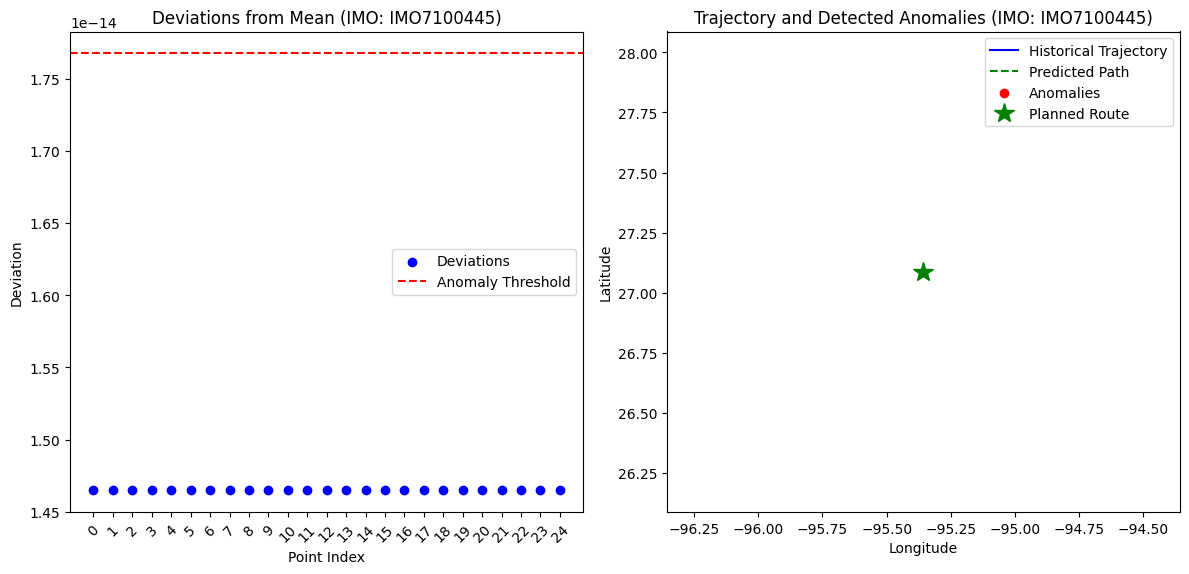

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO7114020
Indices with deviations greater than allowed deviation (IMO: IMO7114020): []


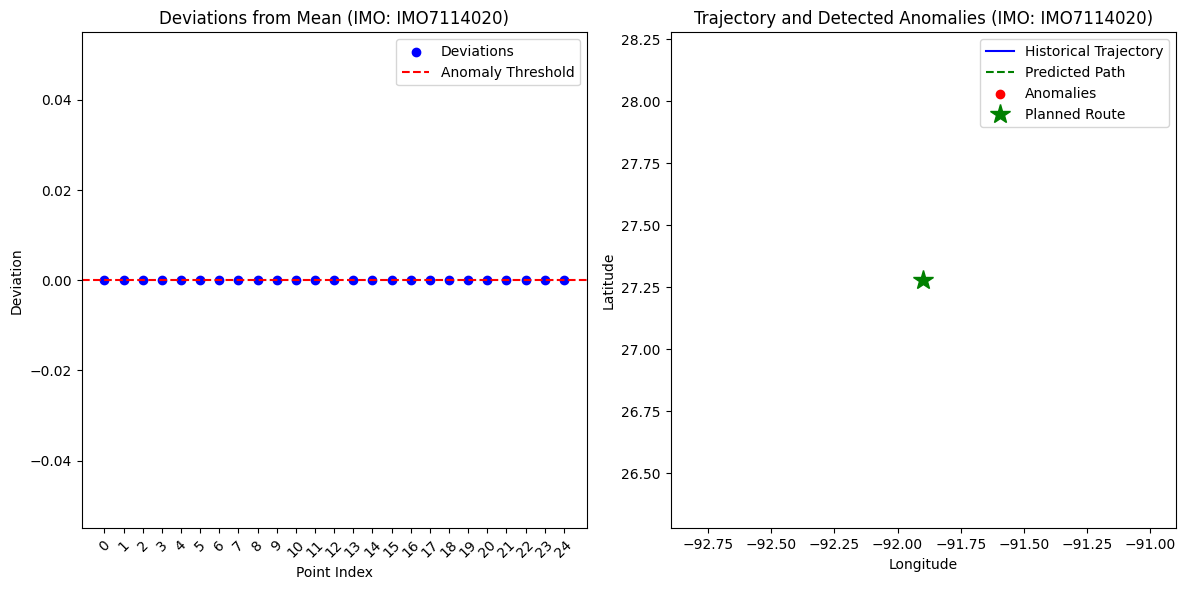

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO7208297
Indices with deviations greater than allowed deviation (IMO: IMO7208297): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


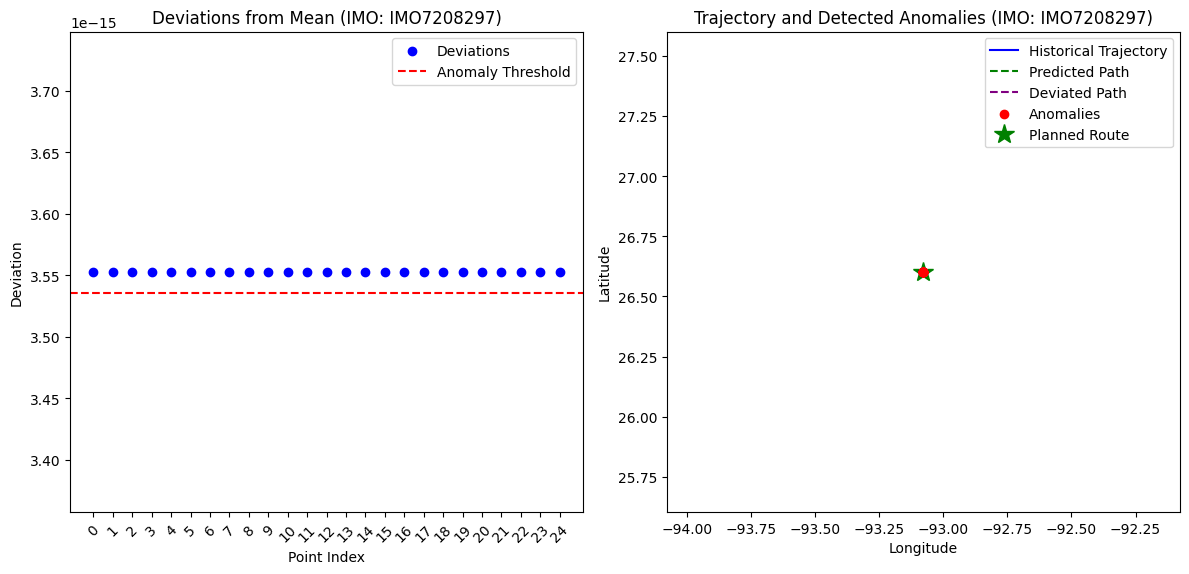

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing ship IMO: IMO7302897
Indices with deviations greater than allowed deviation (IMO: IMO7302897): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


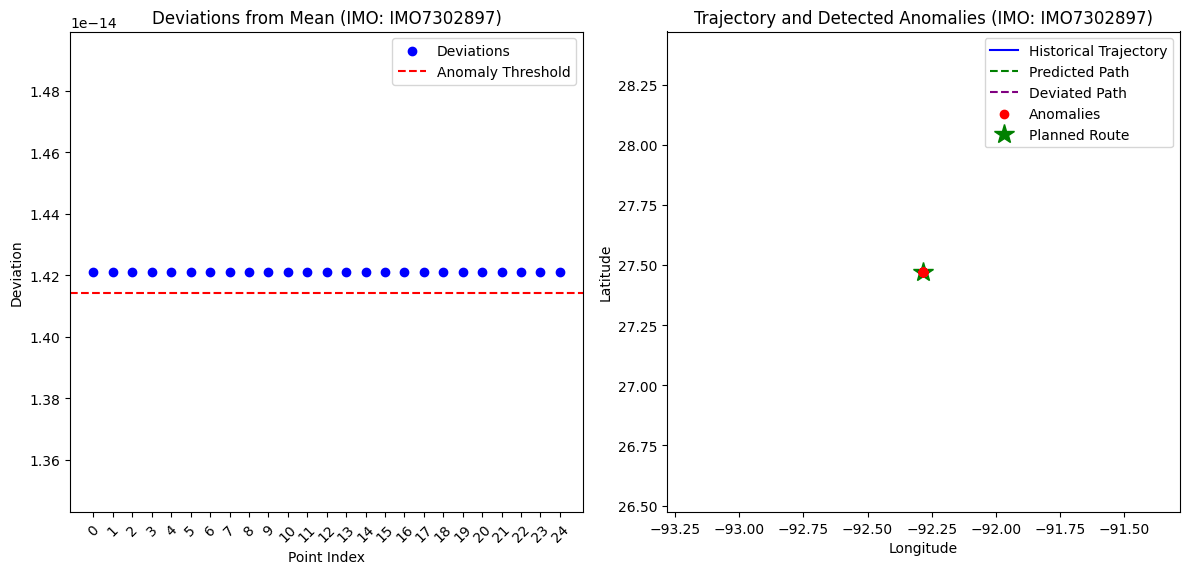

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing ship IMO: IMO7318999
Indices with deviations greater than allowed deviation (IMO: IMO7318999): []


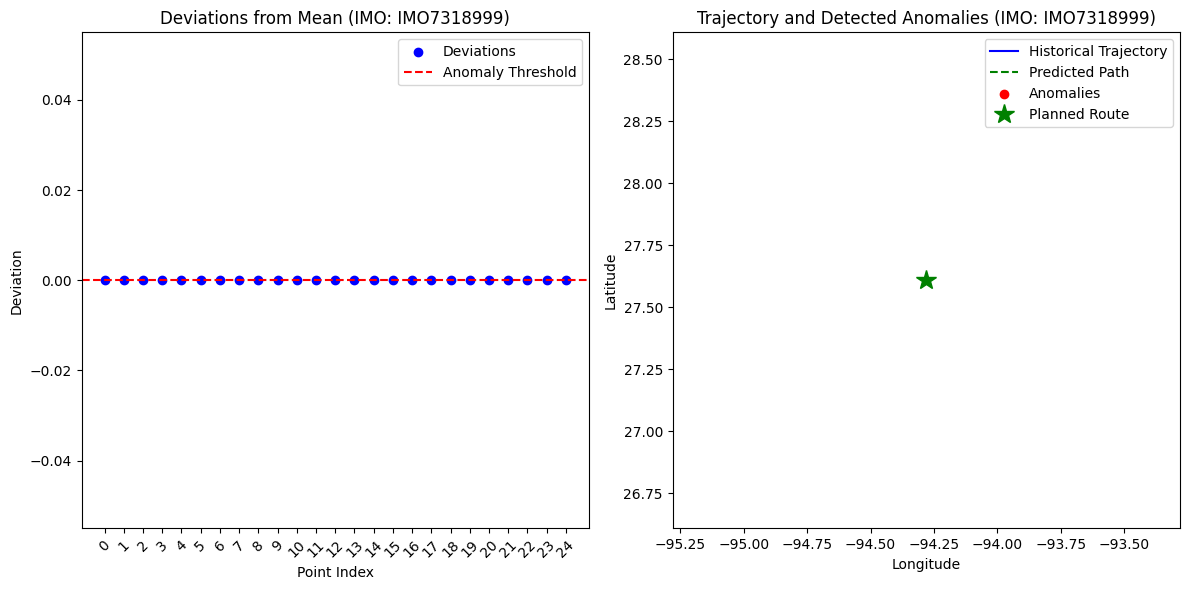

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO7326312
Indices with deviations greater than allowed deviation (IMO: IMO7326312): []


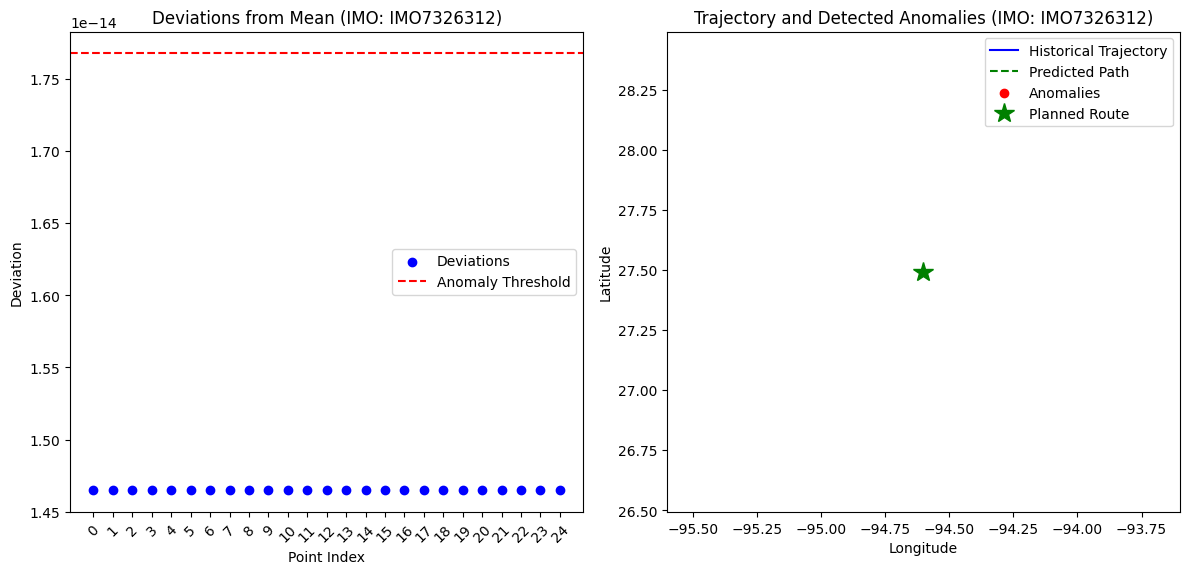

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO7338315
Indices with deviations greater than allowed deviation (IMO: IMO7338315): []


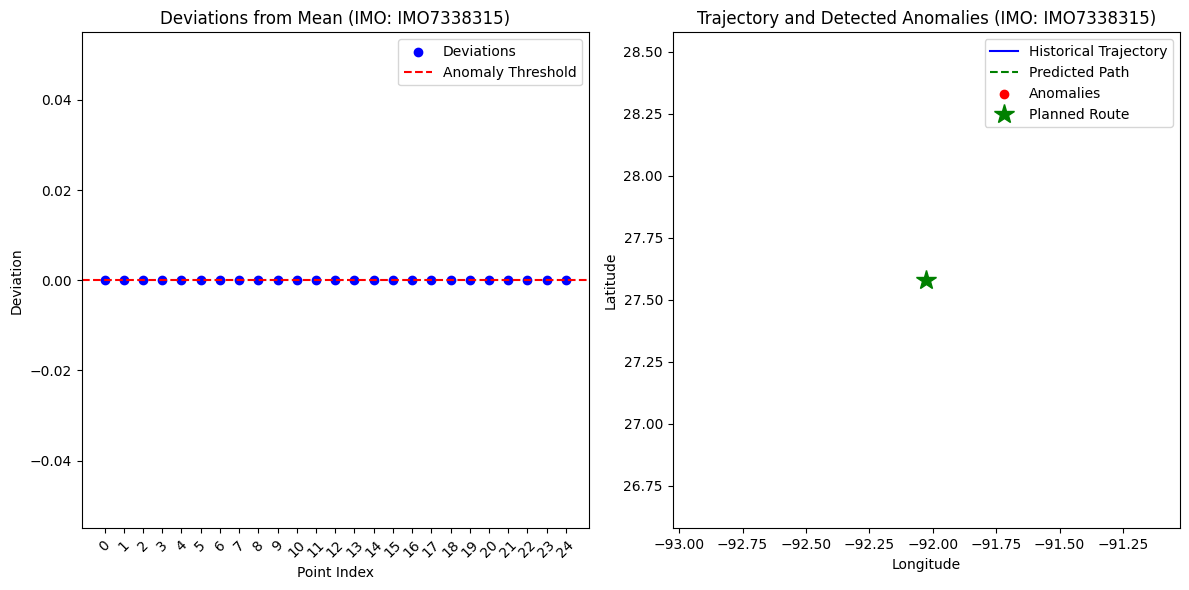

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO7367249
Indices with deviations greater than allowed deviation (IMO: IMO7367249): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


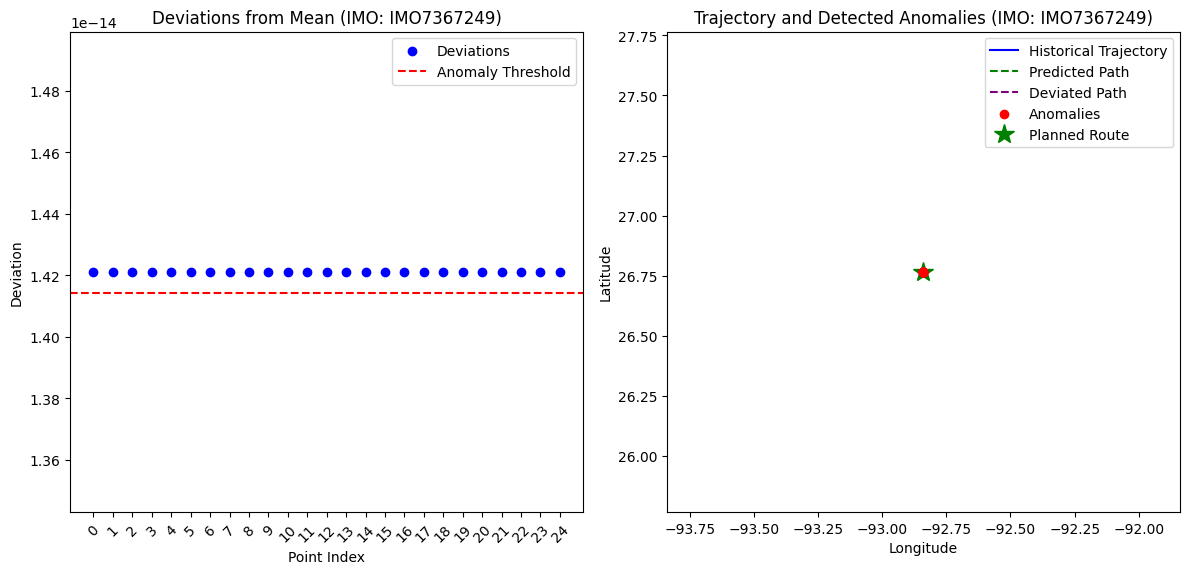

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing ship IMO: IMO7390765
Indices with deviations greater than allowed deviation (IMO: IMO7390765): []


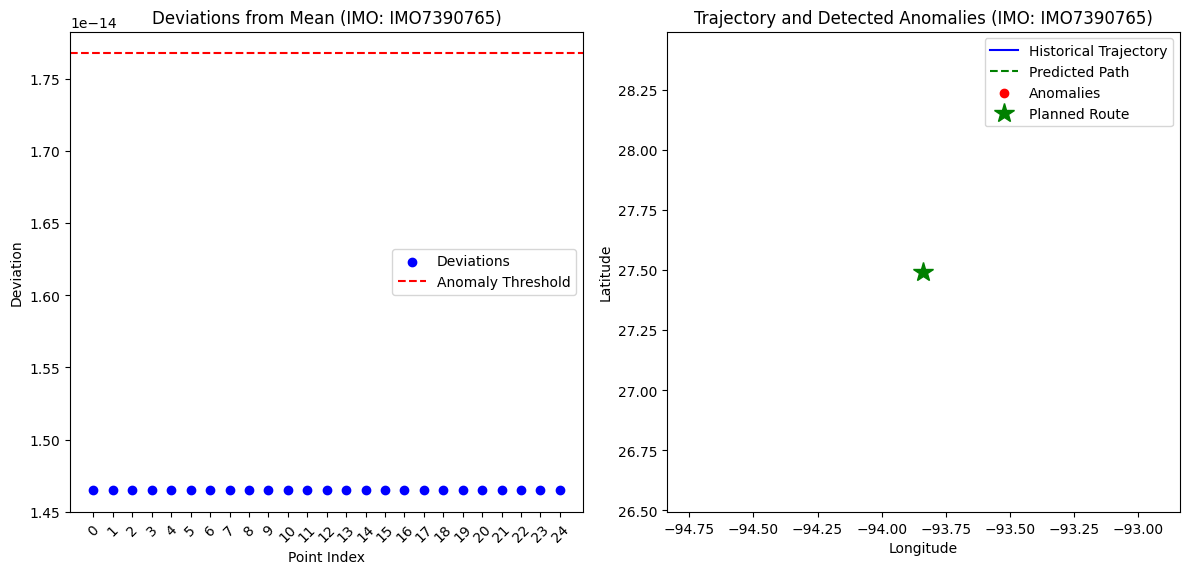

Total points: 25
Anomalies detected: 0
Anomaly percentage: 0.00%

Processing ship IMO: IMO7390973
Indices with deviations greater than allowed deviation (IMO: IMO7390973): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


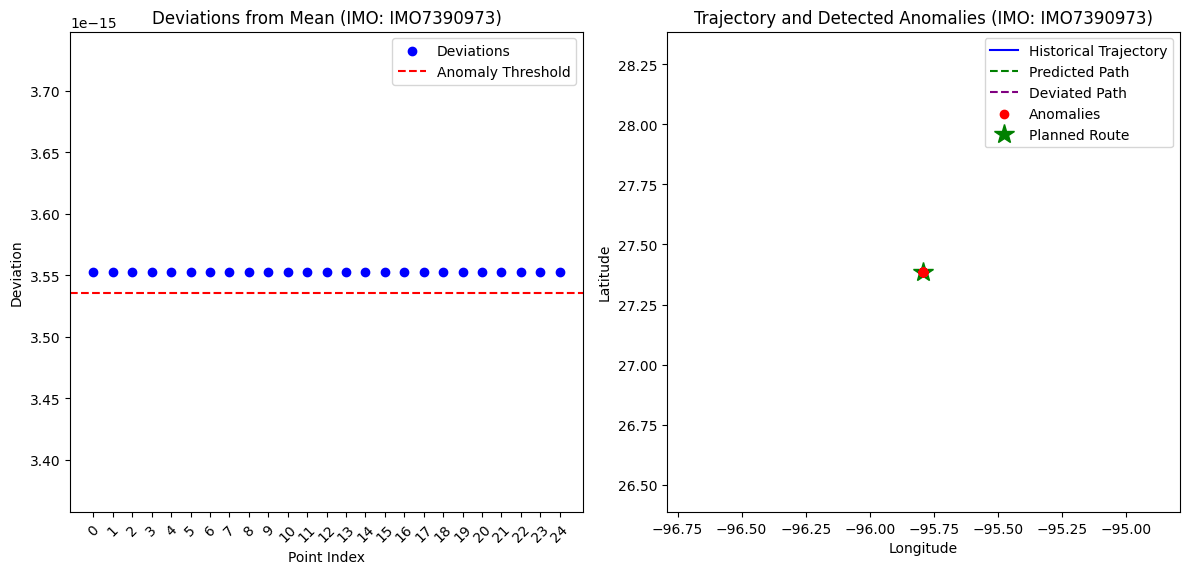

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing ship IMO: IMO7390997
Indices with deviations greater than allowed deviation (IMO: IMO7390997): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


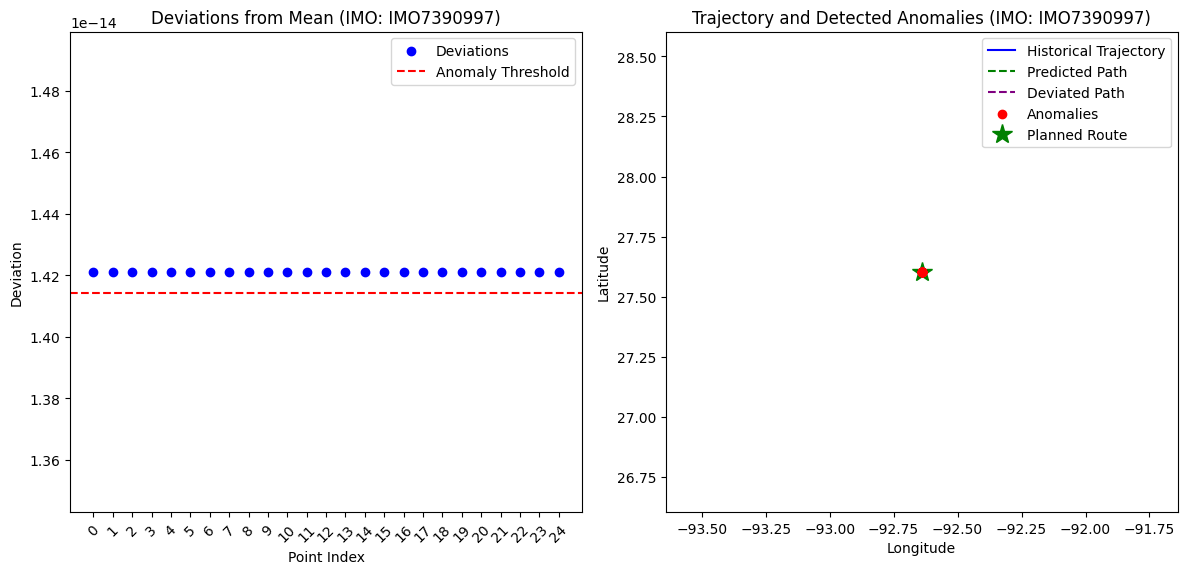

Total points: 25
Anomalies detected: 25
Anomaly percentage: 100.00%

Processing complete.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def rayda_criterion(trajectory_points, k=1.95):
    """
    Detect anomalies using Rayda's criterion based on standard deviations from the mean.
    k is the multiplier for the standard deviation (1, 2, or 3).
    """
    # Calculate mean and standard deviation of the trajectory points
    mean_point = np.mean(trajectory_points, axis=0)
    std_dev = np.std(trajectory_points, axis=0, ddof=1)  # Standard deviation with degrees of freedom (ddof = 1)
    
    # Calculate the distance of each point from the mean
    deviations = np.linalg.norm(trajectory_points - mean_point, axis=1)
    
    # Detect anomalies where deviation exceeds k * standard deviation
    anomaly_threshold = k * np.mean(std_dev)  # k is the multiplier (1, 2, 3 etc.)
    
    anomalies = deviations > anomaly_threshold
    return anomalies, mean_point, std_dev, deviations, anomaly_threshold

# Load and preprocess data
csv_file_path = '/kaggle/input/corrected-data-1/corrected_trajectory_data_ok_1 (2).csv'  # replace with your actual CSV file path
df = pd.read_csv(csv_file_path)

print("Columns in the dataset:")
print(df.columns)

# Ensure the required columns are present
required_columns = ['Corrected_LON', 'Corrected_LAT', 'IMO']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"Missing one or more required columns: {required_columns}")

# Group by IMO and process each ship separately
for imo, group in df.groupby('IMO'):
    print(f"\nProcessing ship IMO: {imo}")
    
    # Extract the trajectory points (Corrected Longitude and Latitude)
    trajectory_points = group[['Corrected_LON', 'Corrected_LAT']].values
    
    # Limit the number of points to 50 if there are more
    if len(trajectory_points) > 15:
        trajectory_points = trajectory_points[:25]
    
    if len(trajectory_points) < 2:
        print(f"Not enough data points for ship IMO {imo}. Skipping.")
        continue

    # Detect anomalies using Rayda's criterion with the threshold defined by k * std_dev
    k = 1.95  # Use multiplier for the standard deviation
    anomalies, mean_point, std_dev, deviations, anomaly_threshold = rayda_criterion(trajectory_points, k)

    # Calculate anomaly percentage
    anomaly_count = np.sum(anomalies)
    anomaly_percentage = (anomaly_count / len(trajectory_points)) * 100
    
    # Visualize results
    plt.figure(figsize=(12, 6))  # Adjusted figure size for clarity

    # Plot scatter plot of deviations
    plt.subplot(121)
    
    plt.scatter(np.arange(len(deviations)), deviations, color='blue', label='Deviations')
    plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label='Anomaly Threshold')
    plt.title(f"Deviations from Mean (IMO: {imo})")
    plt.xlabel("Point Index")
    plt.ylabel("Deviation")
    
    # Set x-axis ticks to a spacing of 0.1
    plt.xticks(np.arange(0, len(deviations), 1), rotation=45)
    
    plt.legend()

    # Calculate index points with deviations > allowed deviation
    indices_above_threshold = np.where(deviations > anomaly_threshold)[0]
    print(f"Indices with deviations greater than allowed deviation (IMO: {imo}): {indices_above_threshold}")

    # Plot trajectory, predicted path, and anomalies with scatter plot for predicted and anomalous paths
    plt.subplot(122)
    
    # Define zoom area with spacing of 0.1 for longitude and latitude
    zoom_lon_min = np.min(trajectory_points[:, 0]) - 1
    zoom_lon_max = np.max(trajectory_points[:, 0]) + 1
    zoom_lat_min = np.min(trajectory_points[:, 1]) - 1
    zoom_lat_max = np.max(trajectory_points[:, 1]) + 1
    
    # Plot the actual trajectory (Corrected Longitude and Latitude)
    plt.plot(trajectory_points[:, 0], trajectory_points[:, 1], color='blue', label='Historical Trajectory', linestyle='-')
    
    # Interpolate to create a smooth path for the predicted trajectory
    if len(trajectory_points) > 1:
        # Interpolate longitude and latitude
        indices = np.arange(len(trajectory_points))
        interp_func_lon = interp1d(indices, trajectory_points[:, 0], kind='linear', fill_value="extrapolate")
        interp_func_lat = interp1d(indices, trajectory_points[:, 1], kind='linear', fill_value="extrapolate")

        # Generate new indices for smooth path
        smooth_indices = np.linspace(0, len(trajectory_points) - 1, num=100)
        smooth_lon = interp_func_lon(smooth_indices)
        smooth_lat = interp_func_lat(smooth_indices)

        plt.plot(smooth_lon, smooth_lat, color='green', linestyle='--', label='Predicted Path')
    
    # Highlight the deviated path (path deviating significantly from the mean)
    deviated_indices = np.where(anomalies)[0]
    if len(deviated_indices) > 0:
        plt.plot(trajectory_points[deviated_indices, 0], trajectory_points[deviated_indices, 1], color='purple', linestyle='--', label='Deviated Path')

    # Highlight anomalies with red dots
    plt.scatter(trajectory_points[deviated_indices, 0], trajectory_points[deviated_indices, 1], color='red', label='Anomalies', zorder=5)

    # Plot the mean point (as a representative planned route)
    plt.plot(mean_point[0], mean_point[1], 'g*', markersize=15, label='Planned Route')
    
    # Adjust axis limits for zoom
    plt.xlim([zoom_lon_min, zoom_lon_max])
    plt.ylim([zoom_lat_min, zoom_lat_max])
    
    plt.title(f"Trajectory and Detected Anomalies (IMO: {imo})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print summary
    print(f"Total points: {len(trajectory_points)}")
    print(f"Anomalies detected: {anomaly_count}")
    print(f"Anomaly percentage: {anomaly_percentage:.2f}%")

print("\nProcessing complete.")


Using the DBSCAN algorithm(clustering model) with simple isolation forest to calculate and detect anomalies in ship and draw a frequency vs anomaly score graph

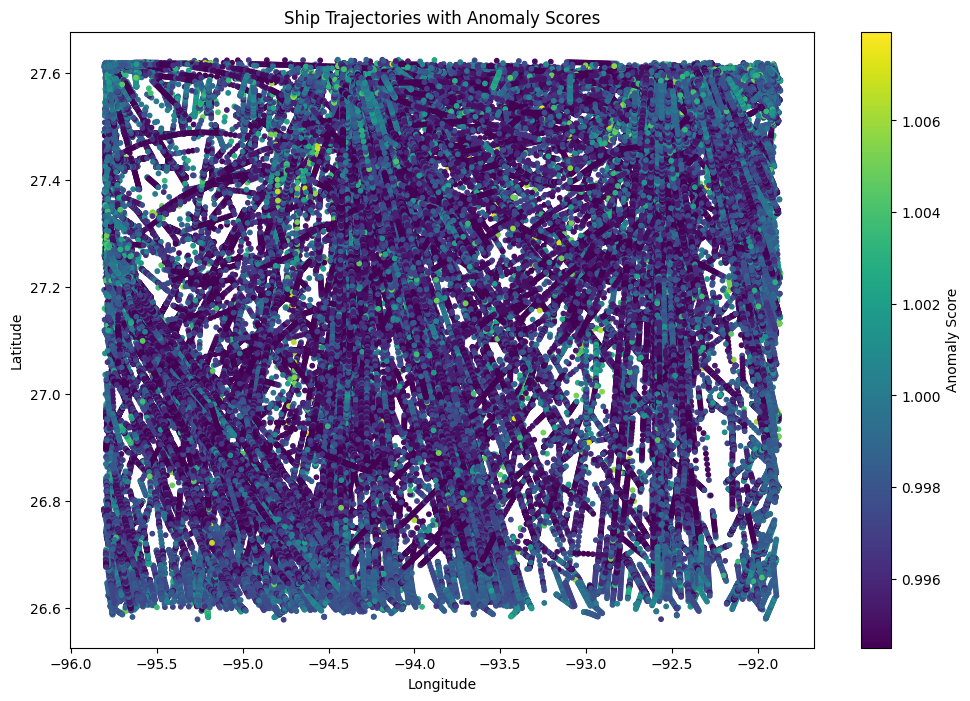

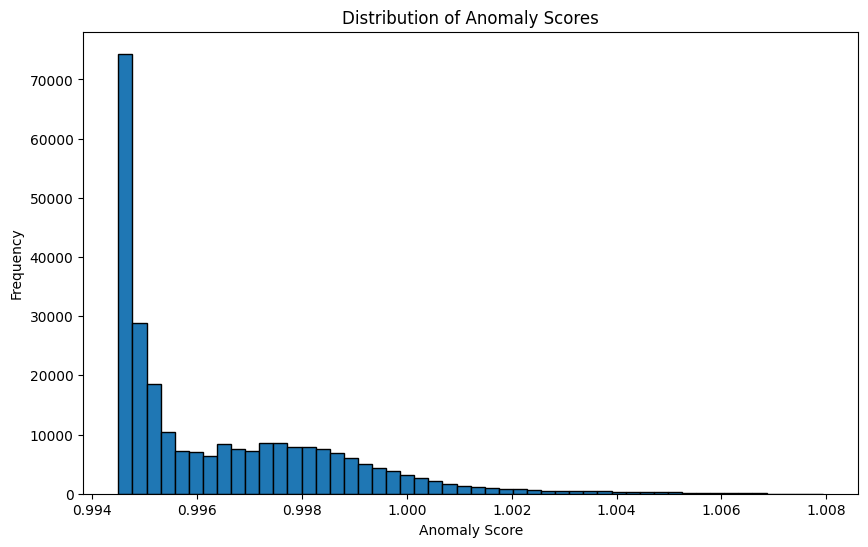

Number of anomalies detected: 262035

Top 10 anomalies:
               IMO        BaseDateTime        LAT        LON  AnomalyScore
166299  IMO9725316 2024-03-28 14:38:00  27.563531 -92.541025      1.007936
157060  IMO9709233 2023-10-22 08:42:00  27.195354 -93.614376      1.007902
156147  IMO9708148 2023-12-21 20:35:00  27.533659 -93.256529      1.007636
3986    IMO8790091 2023-05-01 11:13:00  27.115969 -92.993873      1.007586
83737   IMO9435909 2023-12-07 00:36:00  27.118624 -95.717434      1.007545
205797  IMO9802310 2024-01-15 11:09:00  26.784773 -95.196556      1.007441
155944  IMO9708045 2024-01-14 06:53:00  27.616670 -94.128298      1.007437
23642   IMO9285134 2023-08-09 09:58:00  27.086457 -91.949699      1.007403
45784   IMO9343194 2023-11-10 11:48:00  27.212091 -94.342281      1.007371
26610   IMO9294666 2024-01-12 15:58:00  26.970959 -93.684117      1.007365


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def load_data(file_path):
    df = pd.read_csv(file_path)
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], errors='coerce')  # Automatically parse date-time
    return df


def calculate_features(df):
    # Instantaneous attributes
    df['SOG_variation'] = df.groupby('IMO')['SOG'].diff()
    df['COG_variation'] = df.groupby('IMO')['COG'].diff()
    
    # Average attributes
    window = 5  # Adjust as needed
    df['Avg_speed'] = df.groupby('IMO')['SOG'].rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    df['Avg_acceleration'] = df.groupby('IMO')['SOG'].diff().rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    
    return df

def isolation_forest(X, n_estimators=100, contamination=0.1):
    clf = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
    return clf.fit(X)

def calculate_anomaly_score(clf, X):
    path_length = clf.decision_function(X)
    n = len(X)
    c = 2 * (np.log(n - 1) + 0.5772156649) - (2 * (n - 1) / n)
    return 2 ** (-path_length / c)

def entropy_weight_method(scores):
    # Normalize scores
    p = scores / scores.sum(axis=0)
    
    # Calculate entropy
    e = -np.sum(p * np.log(p + 1e-10), axis=0) / np.log(len(scores))
    
    # Calculate weights
    w = (1 - e) / (len(e) - e.sum())
    return w / w.sum()

from sklearn.impute import SimpleImputer

def main(file_path):
    # Load and preprocess data
    df = load_data(file_path)
    df = calculate_features(df)
    
    # Select features
    features = ['SOG', 'COG', 'SOG_variation', 'COG_variation', 'Avg_speed', 'Avg_acceleration']
    X = df[features]
    
    # Handle missing values by imputing
    imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like median, most_frequent, or constant
    X_imputed = imputer.fit_transform(X)
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    # Initialize anomaly scores
    anomaly_scores = np.zeros((len(X), len(features)))
    
    # Apply Isolation Forest for each feature
    for i, feature in enumerate(features):
        clf = isolation_forest(X_scaled[:, i].reshape(-1, 1))
        anomaly_scores[:, i] = calculate_anomaly_score(clf, X_scaled[:, i].reshape(-1, 1))
    
    # Calculate weights using entropy weight method
    weights = entropy_weight_method(anomaly_scores)
    
    # Calculate final anomaly score
    final_scores = np.dot(anomaly_scores, weights)
    
    # Add anomaly scores to the dataframe
    df['AnomalyScore'] = final_scores
    
    return df

def visualize_results(df):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['LON'], df['LAT'], c=df['AnomalyScore'], cmap='viridis', s=10)
    plt.colorbar(scatter, label='Anomaly Score')
    plt.title('Ship Trajectories with Anomaly Scores')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(df['AnomalyScore'], bins=50, edgecolor='black')
    plt.title('Distribution of Anomaly Scores')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    file_path = "/kaggle/input/isolation-forest/processed_ais_data_1.csv"  # Replace with your CSV file path
    result_df = main(file_path)
    visualize_results(result_df)
    
    # Print summary of detected anomalies
    threshold = 0.8  # Adjust as needed
    anomalies = result_df[result_df['AnomalyScore'] > threshold]
    print(f"Number of anomalies detected: {len(anomalies)}")
    print("\nTop 10 anomalies:")
    print(anomalies.sort_values('AnomalyScore', ascending=False).head(10)[['IMO', 'BaseDateTime', 'LAT', 'LON', 'AnomalyScore']])

In [3]:
pip install rdp

  Preparing metadata (setup.py) ... done
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4586 sha256=f865bcef95af59540129c8553e7790cfb4e3507e8ede148c16c804e8d1f6f0a4
  Stored in directory: /root/.cache/pip/wheels/5d/12/ec/0fc50553af000b9c3d2c74b9f77a01ae4bfe856e9917ac239c
Successfully built rdp
Note: you may need to restart the kernel to use updated packages.


Using the DBSCAN algorithm and DTW MODEL to find anomalies in ship tracks and draing an anomlay score vs frequency graph

DTW Distances between segments: [0.7378521036383001]


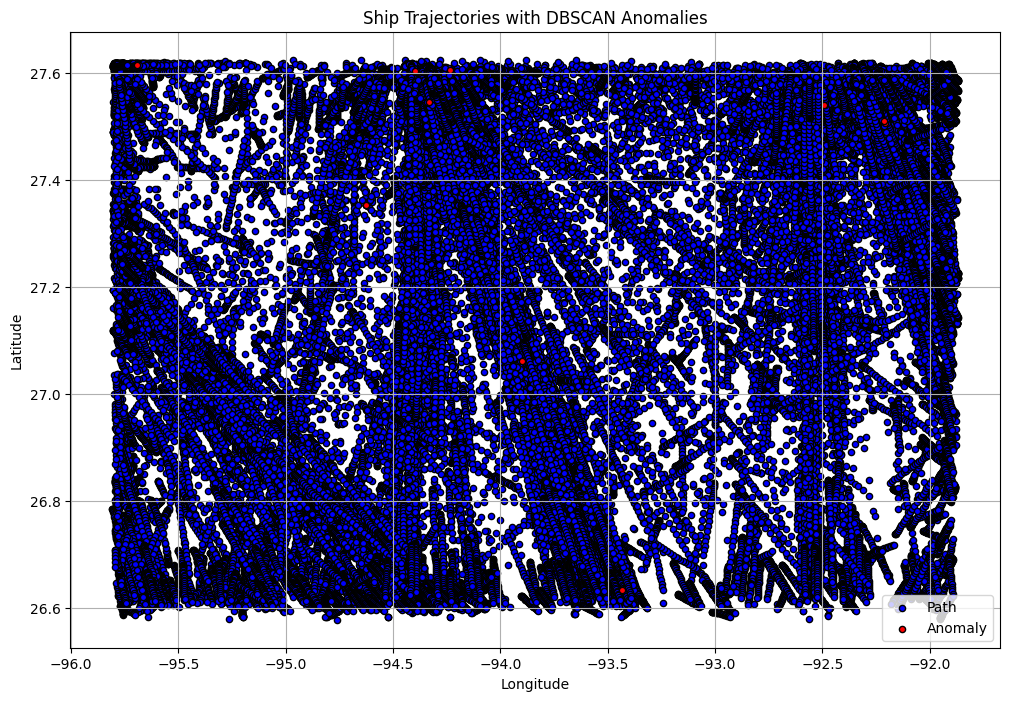

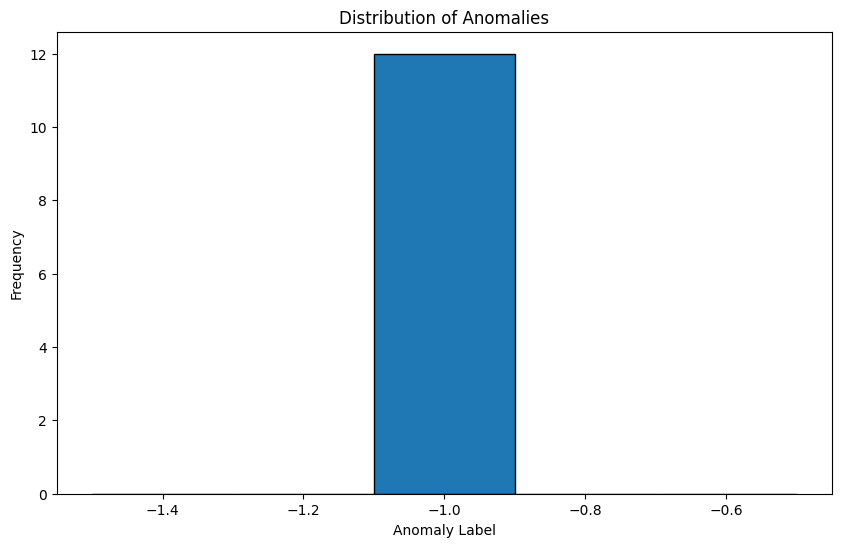

Number of anomalies detected: 12

Top 10 anomalies:
           IMO              BaseDateTime        LAT        LON  Anomaly
10  IMO9725316 2024-03-28 14:39:00+00:00  27.539506 -92.494343       -1
2   IMO0000001 2024-03-27 19:36:00+00:00  27.353673 -94.625395       -1
1   IMO0000001 2024-03-27 17:05:00+00:00  27.353670 -94.625321       -1
0   IMO0000001 2024-03-27 16:41:00+00:00  27.353670 -94.625430       -1
7   IMO9520637 2024-03-26 19:59:00+00:00  27.546188 -94.333940       -1
5   IMO9437050 2024-03-25 02:31:00+00:00  27.509390 -92.211219       -1
4   IMO9437050 2024-03-25 02:30:00+00:00  27.506915 -92.208517       -1
3   IMO1035211 2024-03-07 17:07:00+00:00  27.615580 -95.692055       -1
11  IMO9810331 2024-02-27 11:59:00+00:00  26.633721 -93.433979       -1
8   IMO9538880 2024-02-22 18:59:00+00:00  27.061223 -93.897930       -1


In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from rdp import rdp
from math import atan2, sin

def load_data(file_path):
    df = pd.read_csv(file_path)
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], errors='coerce', utc=True)
    df = df.dropna(subset=['BaseDateTime'])
    return df

# Calculate features (SOG variation, COG variation, etc.)
def calculate_features(df):
    df['SOG_variation'] = df.groupby('IMO')['SOG'].diff()
    df['COG_variation'] = df.groupby('IMO')['COG'].diff()
    
    window = 5  # Adjust as needed
    df['Avg_speed'] = df.groupby('IMO')['SOG'].rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    df['Avg_acceleration'] = df.groupby('IMO')['SOG'].diff().rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    
    # Ensure datetime operations are correct
    df['Time_diff'] = df.groupby('IMO')['BaseDateTime'].diff().dt.total_seconds()
    df['SpeedChangeRate'] = df.groupby('IMO')['SOG'].diff() / df['Time_diff']
    df['KeepPoint'] = (df['SpeedChangeRate'].abs() > 0.1)
    
    return df

# Apply DBSCAN for anomaly detection
def dbscan_anomaly_detection(df, eps=0.5, min_samples=10):
    features = ['LAT', 'LON', 'SOG', 'COG']
    X = df[features].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['Anomaly'] = dbscan.fit_predict(X_scaled)
    
    # Flag anomalies
    df['Anomaly'] = df['Anomaly'].apply(lambda x: -1 if x == -1 else np.nan)
    
    return df

# Step 3: Calculate Point-Segment Distance
def point_to_segment_distance(point, seg_start, seg_end):
    x, y = point
    x1, y1 = seg_start
    x2, y2 = seg_end

    A = np.array([x, y])
    B = np.array([x1, y1])
    C = np.array([x2, y2])

    if np.all(B == C):
        return np.linalg.norm(A - B)
    
    AB = B - A
    BC = C - B
    t = np.dot(AB, BC) / np.dot(BC, BC)
    t = np.clip(t, 0, 1)
    projection = B + t * BC
    return np.linalg.norm(A - projection)

# Step 4: Unidirectional Segment-Segment Distance
def unidirectional_segment_distance(S_i, S_j):
    seg_start_i, seg_end_i = S_i
    seg_start_j, seg_end_j = S_j
    length_S_i = np.linalg.norm(np.array(seg_end_i) - np.array(seg_start_i))
    
    return (point_to_segment_distance(seg_start_i, seg_start_j, seg_end_j) + 
            point_to_segment_distance(seg_end_i, seg_start_j, seg_end_j)) / length_S_i

# Step 5: Bidirectional Segment-Segment Distance
def bidirectional_segment_distance(S_i, S_j):
    d1 = unidirectional_segment_distance(S_i, S_j)
    d2 = unidirectional_segment_distance(S_j, S_i)
    return (d1 + d2) / 2

# Step 6: Angular Distance Calculation
def angular_distance(S_i, S_j):
    (x_i1, y_i1), (x_i2, y_i2) = S_i
    (x_j1, y_j1), (x_j2, y_j2) = S_j

    # Calculate the angles of the two segments
    theta_i = atan2(y_i2 - y_i1, x_i2 - x_i1)
    theta_j = atan2(y_j2 - y_j1, x_j2 - x_j1)
    
    # Calculate the angle difference
    angle_diff = abs(theta_i - theta_j)
    
    if angle_diff > np.pi:
        angle_diff = 2 * np.pi - angle_diff
    
    length_S_i = np.linalg.norm(np.array([x_i2, y_i2]) - np.array([x_i1, y_i1]))
    
    if 0 <= angle_diff <= np.pi / 2:
        return length_S_i * sin(angle_diff)
    else:
        return length_S_i

# Step 7: Segment-Segment Comprehensive Distance Calculation
def segment_comprehensive_distance(S_i, S_j, w1=0.5, w2=0.5):
    linear_dist = bidirectional_segment_distance(S_i, S_j)
    angular_dist = angular_distance(S_i, S_j)
    return w1 * linear_dist + w2 * angular_dist

# Step 8: Dynamic Time Warping (DTW) Distance Calculation
def dtw_distance(T1, T2):
    m, n = len(T1), len(T2)
    dtw_matrix = np.full((m, n), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(m):
        for j in range(n):
            S_i = T1[i]
            S_j = T2[j]
            cost = segment_comprehensive_distance(S_i, S_j)
            if i == 0 and j == 0:
                dtw_matrix[i, j] = cost
            elif i == 0:
                dtw_matrix[i, j] = cost + dtw_matrix[i, j - 1]
            elif j == 0:
                dtw_matrix[i, j] = cost + dtw_matrix[i - 1, j]
            else:
                dtw_matrix[i, j] = cost + min(
                    dtw_matrix[i - 1, j],    # insertion
                    dtw_matrix[i, j - 1],    # deletion
                    dtw_matrix[i - 1, j - 1] # match
                )
    
    return dtw_matrix[m - 1, n - 1]

# Douglas-Peucker algorithm for trajectory compression and speed change rate
def compress_trajectory(df):
    compressed_trajectories = []
    dtw_distances = []  # List to store DTW distances between ship trajectories
    
    for imo, group in df.groupby('IMO'):
        coords = group[['LAT', 'LON']].values
        compressed_coords = rdp(coords, epsilon=0.001)
        
        # Ensure the group contains necessary columns and operations are valid
        if 'SOG' in group.columns and 'BaseDateTime' in group.columns:
            group['SpeedChangeRate'] = group['SOG'].diff() / group['BaseDateTime'].diff().dt.total_seconds()
            group['KeepPoint'] = group['SpeedChangeRate'].abs() > 0.1
            
            compressed_points = group.loc[group['KeepPoint'] | group.index.isin(np.where(np.isin(coords, compressed_coords))[0])]
            compressed_trajectories.append(compressed_points)
            
            segments = list(zip(compressed_points[['LAT', 'LON']].values[:-1], compressed_points[['LAT', 'LON']].values[1:]))
            if len(segments) > 1:
                T1 = segments[:-1]
                T2 = segments[1:]
                distance = dtw_distance(T1, T2)
                dtw_distances.append(distance)

    if not compressed_trajectories:
        print("No trajectories to compress.")
    else:
        print("DTW Distances between segments:", dtw_distances)
    
    return pd.concat(compressed_trajectories, ignore_index=True), dtw_distances
def visualize_results(df, df_real):
    plt.figure(figsize=(12, 8))
    
    # Plot normal paths (all points) with line
    anomaly_paths = df[df['Anomaly'] == -1]
    
    plt.scatter(df_real['LON'], df_real['LAT'], c='blue', label='Path', s=20, edgecolor='k')
    
    # Plot anomalies as red points
    plt.scatter(anomaly_paths['LON'], df['LAT'], c='red', label='Anomaly', s=20, edgecolor='k')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Ship Trajectories with DBSCAN Anomalies')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(df['Anomaly'], bins=5, edgecolor='black')
    plt.title('Distribution of Anomalies')
    plt.xlabel('Anomaly Label')
    plt.ylabel('Frequency')
    plt.show()
# Main execution
def main(input_file_path, output_file_path="transformed_ais_data.csv"):
    df = load_data(input_file_path)
    df = calculate_features(df)
    
    # Trajectory compression and DTW distance calculation
    df_compressed, dtw_distances = compress_trajectory(df)
    
    # Anomaly detection with DBSCAN
    df_anomalies = dbscan_anomaly_detection(df_compressed)
    
    # Visualize the results with normal paths and anomalies
    visualize_results(df_anomalies, df)
    
    # Save the transformed dataset with new columns and anomaly flags
    df_anomalies.to_csv(output_file_path, index=False)
    
    # Print summary of anomalies
    anomalies = df_anomalies[df_anomalies['Anomaly'] == -1]
    print(f"Number of anomalies detected: {len(anomalies)}")
    print("\nTop 10 anomalies:")
    print(anomalies.sort_values('BaseDateTime', ascending=False).head(10)[['IMO', 'BaseDateTime', 'LAT', 'LON', 'Anomaly']])

if __name__ == "__main__":
    input_file_path = "/kaggle/input/isolation-forest/processed_ais_data_1.csv"  # Replace with your actual file path
    output_file_path = "/kaggle/working/output_anomalies.csv"  # Specify your desired output file path
    main(input_file_path, output_file_path)


In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def load_data(file_path):
    df = pd.read_csv(file_path)
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], errors='coerce', utc=True)
    df = df.dropna(subset=['BaseDateTime'])
    return df

def calculate_features(df):
    df['SOG_variation'] = df.groupby('IMO')['SOG'].diff()
    df['COG_variation'] = df.groupby('IMO')['COG'].diff()
    
    window = 5  # Adjust as needed
    df['Avg_speed'] = df.groupby('IMO')['SOG'].rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)
    df['Avg_acceleration'] = df.groupby('IMO')['SOG'].diff().rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)
    
    df['Time_diff'] = df.groupby('IMO')['BaseDateTime'].diff().dt.total_seconds()
    df['SpeedChangeRate'] = df.groupby('IMO')['SOG'].diff() / df['Time_diff']
    df['KeepPoint'] = (df['SpeedChangeRate'].abs() > 0.1)
    
    # Drop rows with NaN values in features
    df = df.dropna(subset=['SOG_variation', 'COG_variation', 'Avg_speed', 'Avg_acceleration', 'Time_diff', 'SpeedChangeRate'])
    
    return df

def dbscan_anomaly_detection(df, eps=0.5, min_samples=10):
    features = ['LAT', 'LON', 'SOG', 'COG']
    X = df[features].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['Anomaly'] = dbscan.fit_predict(X_scaled)
    
    # Flag anomalies
    df['Anomaly'] = df['Anomaly'].apply(lambda x: -1 if x == -1 else np.nan)
    
    return df

def main(input_file_path, output_file_path="transformed_ais_data.csv"):
    df = load_data(input_file_path)
    df = calculate_features(df)
    
    # Perform anomaly detection
    df = dbscan_anomaly_detection(df)
    
    # Save the transformed dataset
    df.to_csv(output_file_path, index=False)
    print(f"Transformed dataset saved to {output_file_path}")

if __name__ == "__main__":
    input_file_path = "/kaggle/input/isolation-forest/processed_ais_data_1.csv"  # Replace with your actual file path
    output_file_path = "/kaggle/working/this_is_my_sister_work.csv"  # Specify your desired output file path
    main(input_file_path, output_file_path)


Transformed dataset saved to /kaggle/working/this_is_my_sister_work.csv


In [14]:
pip  install rdp

  Preparing metadata (setup.py) ... done
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4586 sha256=62ee7687780ae4679aa4d320e879ed36bdde7bff49b68cd105a15885ccef4cc5
  Stored in directory: /root/.cache/pip/wheels/5d/12/ec/0fc50553af000b9c3d2c74b9f77a01ae4bfe856e9917ac239c
Successfully built rdp
Note: you may need to restart the kernel to use updated packages.


Using DBSCAN Algorithm to calculate change of speed ,change in acceleration and adding them as column parameters(attributes) into the corrected  CSV File  to be taken as input by the Bi-GRU model

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

def load_data(file_path):
    df = pd.read_csv(file_path)
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], errors='coerce', utc=True)
    df = df.dropna(subset=['BaseDateTime'])
    return df

def calculate_features(df):
    df['SOG_variation'] = df.groupby('IMO')['SOG'].diff()
    df['COG_variation'] = df.groupby('IMO')['COG'].diff()
    
    window = 5  # Adjust as needed
    df['Avg_speed'] = df.groupby('IMO')['SOG'].rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    df['Avg_acceleration'] = df.groupby('IMO')['SOG'].diff().rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    
    # Ensure datetime operations are correct
    df['Time_diff'] = df.groupby('IMO')['BaseDateTime'].diff().dt.total_seconds()
    df['SpeedChangeRate'] = df.groupby('IMO')['SOG'].diff() / df['Time_diff']
    df['KeepPoint'] = (df['SpeedChangeRate'].abs() > 0.1)
    
    return df

def dbscan_anomaly_detection(df, eps=0.5, min_samples=10):
    features = ['LAT', 'LON', 'SOG', 'COG']
    X = df[features].values
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['Anomaly'] = dbscan.fit_predict(X_scaled)
    
    # Flag anomalies
    df['Anomaly'] = df['Anomaly'].apply(lambda x: -1 if x == -1 else np.nan)
    
    return df

def main(input_file_path, output_file_path="transformed_ais_data.csv"):
    df = load_data(input_file_path)
    df = calculate_features(df)
    
    # Perform anomaly detection
    df = dbscan_anomaly_detection(df)
    
    # Save the transformed dataset
    df.to_csv(output_file_path, index=False)
    print(f"Transformed dataset saved to {output_file_path}")

if __name__ == "__main__":
    input_file_path = "/kaggle/input/isolation-forest/processed_ais_data_1.csv"  # Replace with your actual file path
    output_file_path = "/kaggle/working/transformed_ais_data.csv"  # Specify your desired output file path
    main(input_file_path, output_file_path)


Transformed dataset saved to /kaggle/working/transformed_ais_data.csv


By using  trained BI-GRU model in combination with DBSCAN Clustering model  to test and Detect the anomalies of ships

Number of sequences generated: 39502
Number of sequences generated: 39502
Mask length (non-anomalous): 39502
Number of non-anomalous sequences: 39122
Training data prepared with 39122 sequences
Epoch [1/20], Loss: 0.0006
Epoch [2/20], Loss: 0.0002
Epoch [3/20], Loss: 0.0003
Epoch [4/20], Loss: 0.0001
Epoch [5/20], Loss: 0.0001
Epoch [6/20], Loss: 0.0001
Epoch [7/20], Loss: 0.0001
Epoch [8/20], Loss: 0.0002
Epoch [9/20], Loss: 0.0001
Epoch [10/20], Loss: 0.0001
Epoch [11/20], Loss: 0.0000
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0001
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0001
Epoch [17/20], Loss: 0.0001
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Model saved successfully!


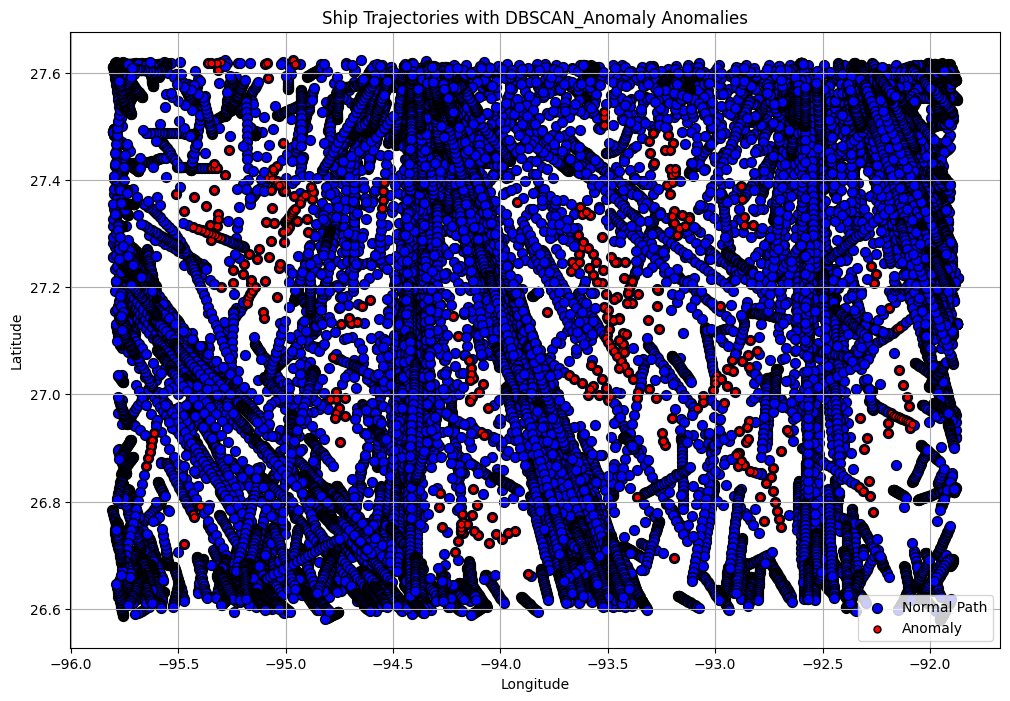

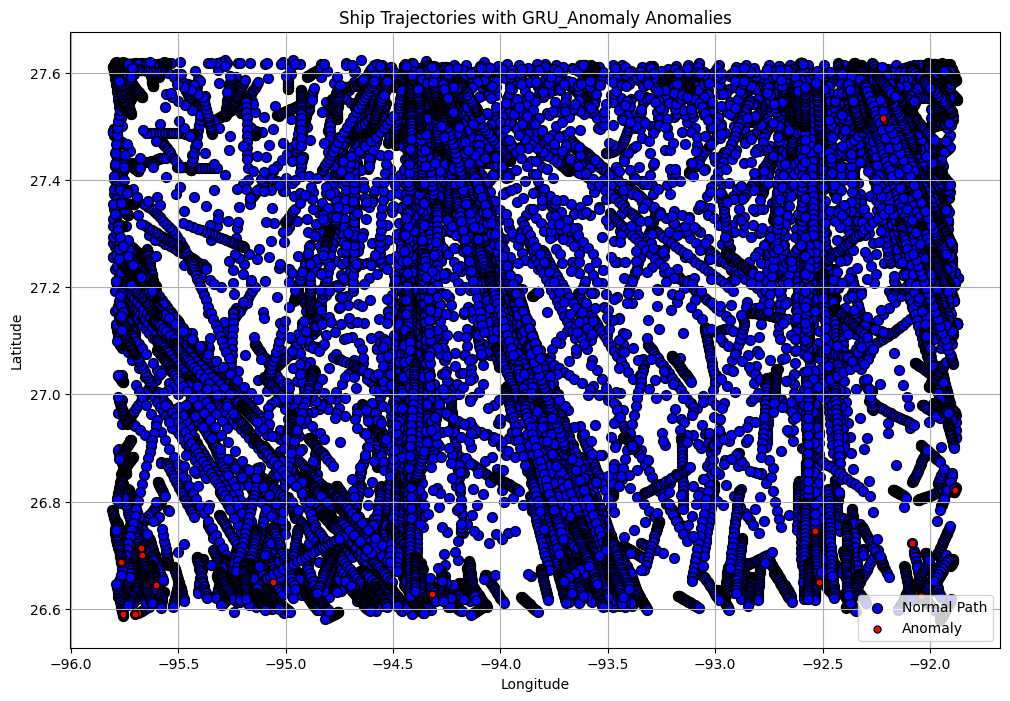

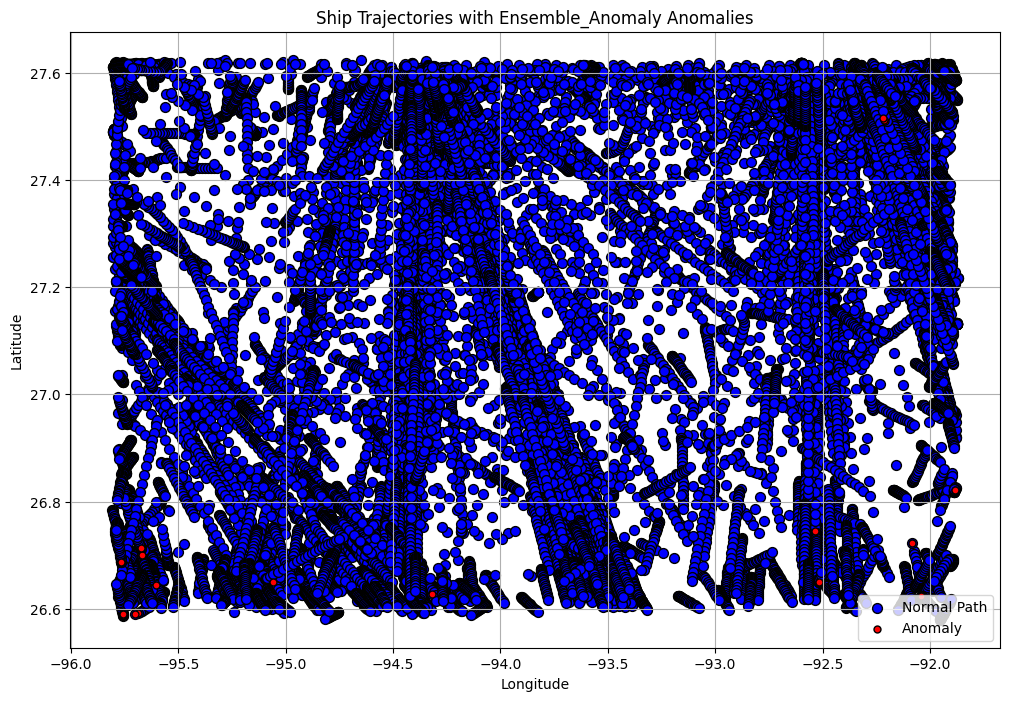

Processed data saved to /kaggle/working/processed_ships.csv


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from torch.utils.data import DataLoader, TensorDataset

# Define the Bi-GRU model
# Define the Bi-GRU model
class BiGRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(BiGRUModel, self).__init__()
        self.num_layers = num_layers  # Store num_layers as an instance variable
        self.hidden_size = hidden_size  # Store hidden_size as an instance variable
        self.gru = nn.GRU(input_size, hidden_size, num_layers, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # bidirectional, so hidden_size * 2

    def forward(self, x):
        # Use self.num_layers and self.hidden_size
        h_0 = torch.zeros(2 * self.num_layers, x.size(0), self.hidden_size).to(x.device)  # 2 for bidirectional
        out, _ = self.gru(x, h_0)
        out = self.fc(out[:, -1, :])  # Take output from the last time step
        return out

# DBSCAN anomaly detection
def dbscan_anomaly_detection(df, eps=0.001, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    df['DBSCAN_Anomaly'] = db.fit_predict(df[['LAT', 'LON']])
    df['DBSCAN_Anomaly'] = df['DBSCAN_Anomaly'].apply(lambda x: 1 if x == -1 else 0)
    return df


def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs in train_loader:
            inputs = inputs[0].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs[:, -1, :])
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

def detect_anomalies(model, test_loader, threshold=0.05):
    model.eval()
    anomalies = []
    
    with torch.no_grad():
        for inputs in test_loader:
            inputs = inputs[0].to(device)
            outputs = model(inputs)
            deviations = torch.abs(outputs - inputs[:, -1, :])  # Deviation from last actual point
            
            for deviation in deviations:
                if torch.mean(deviation).item() > threshold:
                    anomalies.append(1)  # Anomaly
                else:
                    anomalies.append(0)  # Normal
                
    return anomalies

# Visualization function for ensemble results
def visualize_results(df, model_name,df_real):
    plt.figure(figsize=(12, 8))
    
    normal_paths = df[df[model_name] == 0]
    anomaly_paths = df[df[model_name] == 1]
    
    plt.scatter(df_real['LON'], df_real['LAT'], c='blue', label='Normal Path', s=50, edgecolor='k')
    plt.scatter(anomaly_paths['LON'], anomaly_paths['LAT'], c='red', label='Anomaly', s=25, edgecolor='k')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Ship Trajectories with {model_name} Anomalies')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ensemble function
def ensemble_results(df,df_real):
    # Combine results from DBSCAN and Bi-GRU (logical OR of the two models)
    df['Ensemble_Anomaly'] = df[['DBSCAN_Anomaly', 'GRU_Anomaly']].max(axis=1)
    visualize_results(df, 'Ensemble_Anomaly',df_real)

def prepare_sequences(df, sequence_length=25):
    features = df[['LAT', 'LON', 'SOG', 'COG']].values
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)
    
    sequences = []
    for i in range(len(features_scaled) - sequence_length):
        sequences.append(features_scaled[i:i+sequence_length])
    
    sequences = np.array(sequences)
    print(f"Number of sequences generated: {sequences.shape[0]}")
    
    return sequences


def main(df, sequence_length=10, num_epochs=20, hidden_size=64, num_layers=2, threshold=0.05, eps=0.001, min_samples=5, output_file_path="output.csv"):
    # DBSCAN anomaly detection
    df = dbscan_anomaly_detection(df, eps=0.15, min_samples=20)  # Increase `eps`, decrease `min_samples`

    
    # Prepare sequences for Bi-GRU
    sequences = prepare_sequences(df, sequence_length)
    
    # Create a boolean mask for the non-anomalous data but exclude the first 'sequence_length' rows
   # Get the DBSCAN anomaly labels, skipping the first `sequence_length` rows
    non_anomalous_mask = df['DBSCAN_Anomaly'].values[sequence_length:] == 0

    # Ensure the mask matches the number of sequences
    print(f"Number of sequences generated: {len(sequences)}")
    print(f"Mask length (non-anomalous): {len(non_anomalous_mask)}")

    # Check if there are any non-anomalous sequences
    num_non_anomalous_sequences = np.sum(non_anomalous_mask)
    print(f"Number of non-anomalous sequences: {num_non_anomalous_sequences}")

    # Apply the mask to filter non-anomalous sequences
    if num_non_anomalous_sequences > 0:
        train_sequences = sequences[non_anomalous_mask]  # Keep only normal sequences
        train_sequences_tensor = torch.tensor(train_sequences, dtype=torch.float32)
        train_loader = DataLoader(TensorDataset(train_sequences_tensor), batch_size=64, shuffle=True)
        print(f"Training data prepared with {len(train_sequences)} sequences")
    else:
        raise ValueError("No non-anomalous sequences found to train on.")

    # Initialize Bi-GRU model
    input_size = 4  # LAT, LON, SOG, COG
    output_size = 4  # Predicted LAT, LON, SOG, COG
    model = BiGRUModel(input_size, hidden_size, output_size, num_layers).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Train the Bi-GRU model
    train_model(model, train_loader, criterion, optimizer, num_epochs)
    torch.save(model.state_dict(), "/kaggle/working/bigru_model.pth")
    print("Model saved successfully!")
    # Detect anomalies using Bi-GRU
    test_sequences = sequences[non_anomalous_mask]  # Test on non-anomalous data
    test_sequences_tensor = torch.tensor(test_sequences, dtype=torch.float32)
    test_loader = DataLoader(TensorDataset(test_sequences_tensor), batch_size=64, shuffle=False)
    
    gru_anomalies = detect_anomalies(model, test_loader, threshold)
    
    # Add GRU anomalies to the dataframe
    df_test = df.iloc[sequence_length:].copy()  # Exclude the first 'sequence_length' rows
    df_test = df_test[non_anomalous_mask]  # Only include non-anomalous rows
    df_test['GRU_Anomaly'] = gru_anomalies
    
    # Visualize DBSCAN results
    visualize_results(df, 'DBSCAN_Anomaly',df)
    
    # Visualize Bi-GRU results
    visualize_results(df_test, 'GRU_Anomaly',df)

    # Ensemble the results and visualize
    ensemble_results(df_test,df)

    # Save the results
    df_test.to_csv(output_file_path, index=False)
    print(f"Processed data saved to {output_file_path}")

# Sample usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming 'df' is your loaded DataFrame containing ship data
df = pd.read_csv('/kaggle/input/dataset-123/this_is_my_sister_work.csv')

main(df, sequence_length=7, num_epochs=20, hidden_size=64, num_layers=10, threshold=0.01, eps=0.15, min_samples=25, output_file_path="/kaggle/working/processed_ships.csv")




USING  RNN BASED ISOLATION FOREST ALGORITHM (with DBSCAN algorithm)WHICH TAKES CORRECTED csv FILE AS INPUT AND SHOWS ALL SHIPS WITH ANOMALY( ALONG WITH THEIR PERCENTAGE/PROBABILTY) OF ANOMALY AND THE ANOMALY SCORES


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2091/2091 - 11s - 5ms/step - loss: 0.1708 - val_loss: 0.1206
Epoch 2/10
2091/2091 - 9s - 4ms/step - loss: 0.1430 - val_loss: 0.1226
Epoch 3/10
2091/2091 - 8s - 4ms/step - loss: 0.1416 - val_loss: 0.1165
Epoch 4/10
2091/2091 - 9s - 4ms/step - loss: 0.1404 - val_loss: 0.1168
Epoch 5/10
2091/2091 - 9s - 4ms/step - loss: 0.1394 - val_loss: 0.1153
Epoch 6/10
2091/2091 - 9s - 4ms/step - loss: 0.1387 - val_loss: 0.1166
Epoch 7/10
2091/2091 - 8s - 4ms/step - loss: 0.1385 - val_loss: 0.1144
Epoch 8/10
2091/2091 - 9s - 4ms/step - loss: 0.1380 - val_loss: 0.1152
Epoch 9/10
2091/2091 - 8s - 4ms/step - loss: 0.1376 - val_loss: 0.1143
Epoch 10/10
2091/2091 - 9s - 4ms/step - loss: 0.1374 - val_loss: 0.1145
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Detected 20903 anomalies


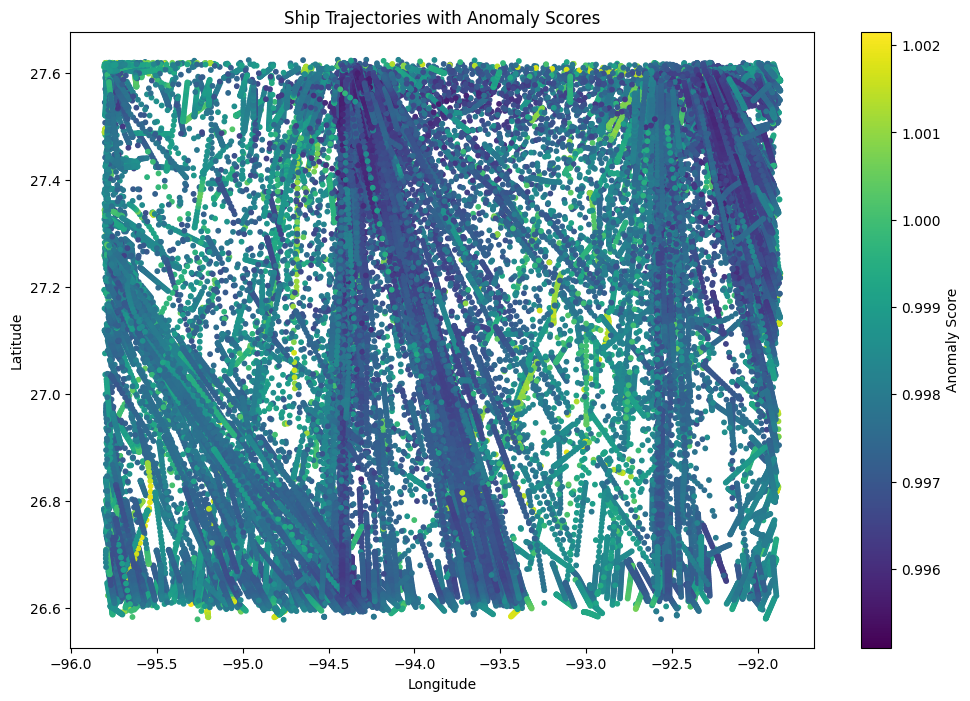

Detected 20903 anomalies in real-time trajectory prediction.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from geopy.distance import geodesic
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load and preprocess the AIS data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'], errors='coerce')
    return df

# Calculate trajectory features
def calculate_features(df):
    df['SOG_variation'] = df.groupby('IMO')['SOG'].diff()
    df['COG_variation'] = df.groupby('IMO')['COG'].diff()

    window = 5
    df['Avg_speed'] = df.groupby('IMO')['SOG'].rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    df['Avg_acceleration'] = df.groupby('IMO')['SOG'].diff().rolling(window=window, min_periods=1).mean().reset_index(0, drop=True)
    
    return df

# Create sequences for RNN input-output using sliding window technique
def create_sequences(data, time_steps=5):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequence = data[i:i+time_steps]
        label = data[i + time_steps]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Build the RNN model using LSTM
def build_rnn(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(4))  # Predicting lon, lat, SOG, COG
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and predict using RNN
def train_rnn_model(X_train, y_train, X_test, epochs=10, batch_size=32):
    model = build_rnn((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    predictions = model.predict(X_test)
    return predictions

# Calculate deviations for position, SOG, and COG
def calculate_deviation(y_true, y_pred):
    pos_deviation = geodesic((y_true[1], y_true[0]), (y_pred[1], y_pred[0])).meters  # Latitude, Longitude deviation
    speed_deviation = abs(y_true[2] - y_pred[2])  # SOG deviation
    course_deviation = abs(y_true[3] - y_pred[3])  # COG deviation
    return pos_deviation, speed_deviation, course_deviation

# DBSCAN-based clustering
def isolation_forest(X, n_estimators=100, contamination=0.1):
    clf = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
    return clf.fit(X)

# Calculate anomaly score
def calculate_anomaly_score(clf, X):
    path_length = clf.decision_function(X)
    n = len(X)
    c = 2 * (np.log(n - 1) + 0.5772156649) - (2 * (n - 1) / n)
    return 2 ** (-path_length / c)

# Entropy weight method to assign weights to anomaly scores
def entropy_weight_method(scores):
    p = scores / scores.sum(axis=0)
    e = -np.sum(p * np.log(p + 1e-10), axis=0) / np.log(len(scores))
    w = (1 - e) / (len(e) - e.sum())
    return w / w.sum()

# Main function to integrate everything
def main(file_path):
    # Load and preprocess data
    df = load_data(file_path)
    df = calculate_features(df)
    
    # Select trajectory features
    features = ['LON', 'LAT', 'SOG', 'COG']
    df = df.dropna(subset=features)
    X = df[features].values
    
    # Apply DBSCAN-based clustering for normal trajectory modeling
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    
    # Isolation Forest for each feature
    anomaly_scores = np.zeros((len(X), len(features)))
    for i, feature in enumerate(features):
        clf = isolation_forest(X_scaled[:, i].reshape(-1, 1))
        anomaly_scores[:, i] = calculate_anomaly_score(clf, X_scaled[:, i].reshape(-1, 1))

    # Calculate weights using entropy weight method
    weights = entropy_weight_method(anomaly_scores)
    final_scores = np.dot(anomaly_scores, weights)
    df['AnomalyScore'] = final_scores

    # Train-test split for RNN model
    time_steps = 5
    sequences, labels = create_sequences(X_scaled, time_steps=time_steps)
    split = int(0.8 * len(sequences))
    X_train, y_train = sequences[:split], labels[:split]
    X_test, y_test = sequences[split:], labels[split:]

    # Train the RNN model and get predictions
    predictions = train_rnn_model(X_train, y_train, X_test)

    # Anomaly detection based on deviations
    threshold_position = 100  # meters
    threshold_speed = 2  # knots
    threshold_course = 15  # degrees
    anomalies = []

    for i in range(len(y_test)):
        pos_dev, speed_dev, course_dev = calculate_deviation(y_test[i], predictions[i])
        if pos_dev > threshold_position or speed_dev > threshold_speed or course_dev > threshold_course:
            anomalies.append((i, pos_dev, speed_dev, course_dev))
    
    print(f"Detected {len(anomalies)} anomalies")
    return df, anomalies

# Visualization for anomalies and trajectories
def visualize_results(df):
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['LON'], df['LAT'], c=df['AnomalyScore'], cmap='viridis', s=10)
    plt.colorbar(scatter, label='Anomaly Score')
    plt.title('Ship Trajectories with Anomaly Scores')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

if __name__ == "__main__":
    file_path = "/kaggle/input/isolation-forest/processed_ais_data_1.csv"  # Replace with your file path
    result_df, detected_anomalies = main(file_path)
    visualize_results(result_df)
    
    # Print summary of detected anomalies
    print(f"Detected {len(detected_anomalies)} anomalies in real-time trajectory prediction.")


In [5]:
pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=110015 sha256=403b096b515e3b0aac9f0bd105007a1504142e3869af223d3b3c7ea74fe937d5
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw
Note: you may need to restart the kernel to use updated packages.


Using BI-GRU model to detect path deviation of a single ship 

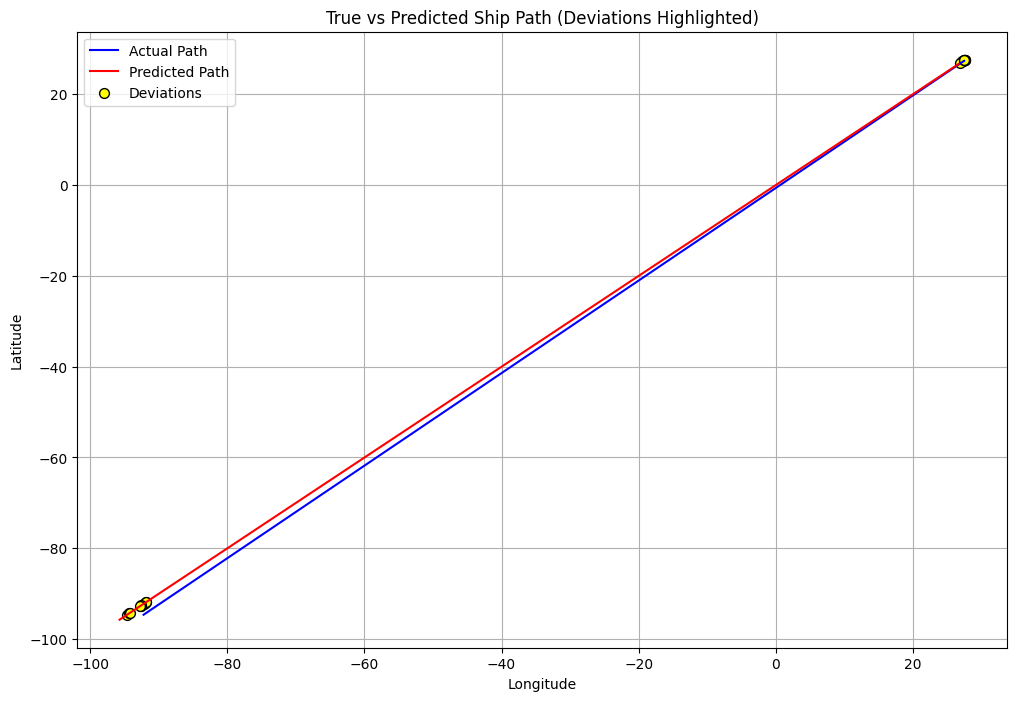

In [31]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.interpolate import interp1d
import pandas as pd

# BiGRU Model Definition
class BiGRUModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(BiGRUModel, self).__init__()
        self.gru = torch.nn.GRU(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = torch.nn.Linear(hidden_size * 2, output_size)  # Bidirectional GRU doubles hidden_size

    def forward(self, x):
        gru_out, _ = self.gru(x)
        out = self.fc(gru_out[:, -1, :])  # Only take output of the last time step
        return out

# Prediction function
def predict_path(model, sequence, scaler, device):
    model.eval()
    with torch.no_grad():
        sequence_tensor = torch.tensor(sequence, dtype=torch.float32).unsqueeze(0).to(device)
        prediction = model(sequence_tensor)
        prediction = prediction.cpu().numpy()
        prediction_rescaled = scaler.inverse_transform(prediction)
    return prediction_rescaled[0]

# Calculate Euclidean distance between actual and predicted points
def calculate_deviation(predicted_path, actual_path):
    lat_lon_diff = np.sqrt((predicted_path[:, 0] - actual_path[:, 0])**2 + 
                           (predicted_path[:, 1] - actual_path[:, 1])**2)
    return lat_lon_diff

# Interpolation function to get more evenly spaced points
def interpolate_path(path, num_points=10):
    path = np.asarray(path)
    interp_lat = interp1d(np.arange(len(path)), path[:, 0], kind='linear')
    interp_lon = interp1d(np.arange(len(path)), path[:, 1], kind='linear')
    new_indices = np.linspace(0, len(path) - 1, num_points)
    interpolated_lat = interp_lat(new_indices)
    interpolated_lon = interp_lon(new_indices)
    return np.column_stack((interpolated_lat, interpolated_lon))

# Plot True vs Predicted Path with highlighted deviations
def plot_paths_with_deviation(predicted_path, actual_path, threshold=0.01):
    deviation = calculate_deviation(predicted_path, actual_path)
    anomalies = deviation > threshold

    num_interpolated_points = 10
    interpolated_predicted_path = interpolate_path(predicted_path, num_interpolated_points)
    interpolated_actual_path = interpolate_path(actual_path, num_interpolated_points)

    plt.figure(figsize=(12, 8))

    plt.plot(interpolated_actual_path[1], interpolated_actual_path[0], c='blue', label='Actual Path')
    plt.plot(interpolated_predicted_path[1], interpolated_predicted_path[0], c='red', label='Predicted Path')
    plt.scatter(interpolated_actual_path[anomalies[1]],interpolated_actual_path[anomalies[0]], color='yellow', label='Deviations', s=50, edgecolors='k')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('True vs Predicted Ship Path (Deviations Highlighted)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to predict and plot paths
def main_predict():
    # Model parameters (example)
    input_size = 4  # LAT, LON, SOG, COG
    hidden_size = 64
    output_size = 4  # Predicted LAT, LON, SOG, COG
    num_layers = 5
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize the model
    model = BiGRUModel(input_size, hidden_size, output_size, num_layers).to(device)

    # Load data from CSV files
    sequence_df = pd.read_csv('/kaggle/input/dataset-123/this_is_my_sister_work.csv')
    actual_path_df = pd.read_csv('/kaggle/input/isolation-forest/processed_ais_data_1.csv')

    # Prepare sequence and actual path arrays
    sequence = sequence_df[['LAT', 'LON', 'SOG', 'COG']].values
    actual_path = actual_path_df[['LAT', 'LON', 'SOG', 'COG']].values

    # Scaling the input data
    scaler = MinMaxScaler()
    scaler.fit(sequence)  # Fit scaler on input sequence

    # Predict the path
    predicted_point = predict_path(model, sequence, scaler, device)

    # Convert predicted_point into a trajectory (for demonstration, repeat the prediction)
    predicted_path = np.array([predicted_point for _ in range(actual_path.shape[0])])

    # Plot the paths and highlight deviations
    plot_paths_with_deviation(predicted_path, actual_path)

if __name__ == "__main__":
    main_predict()


Using simple contracio anomaly detection method using 4-hot vectors to detect deviations in ship's path 

Epoch 1, Loss: 0.0132
Epoch 2, Loss: 0.0117
Epoch 3, Loss: 0.0117
Epoch 4, Loss: 0.0117
Epoch 5, Loss: 0.0117
Epoch 6, Loss: 0.0116
Epoch 7, Loss: 0.0116
Epoch 8, Loss: 0.0116
Epoch 9, Loss: 0.0116
Epoch 10, Loss: 0.0116
Epoch 11, Loss: 0.0116
Epoch 12, Loss: 0.0116
Epoch 13, Loss: 0.0116
Epoch 14, Loss: 0.0116
Epoch 15, Loss: 0.0116
Epoch 16, Loss: 0.0116
Epoch 17, Loss: 0.0116
Epoch 18, Loss: 0.0116
Epoch 19, Loss: 0.0116
Epoch 20, Loss: 0.0116
Epoch 21, Loss: 0.0116
Epoch 22, Loss: 0.0116
Epoch 23, Loss: 0.0116
Epoch 24, Loss: 0.0116
Epoch 25, Loss: 0.0116
Epoch 26, Loss: 0.0116
Epoch 27, Loss: 0.0116
Epoch 28, Loss: 0.0116
Epoch 29, Loss: 0.0116
Epoch 30, Loss: 0.0116
Epoch 31, Loss: 0.0116
Epoch 32, Loss: 0.0116
Epoch 33, Loss: 0.0116
Epoch 34, Loss: 0.0116
Epoch 35, Loss: 0.0116
Epoch 36, Loss: 0.0116
Epoch 37, Loss: 0.0116
Epoch 38, Loss: 0.0116
Epoch 39, Loss: 0.0116
Epoch 40, Loss: 0.0116
Epoch 41, Loss: 0.0116
Epoch 42, Loss: 0.0116
Epoch 43, Loss: 0.0116
Epoch 44, Loss: 0.01

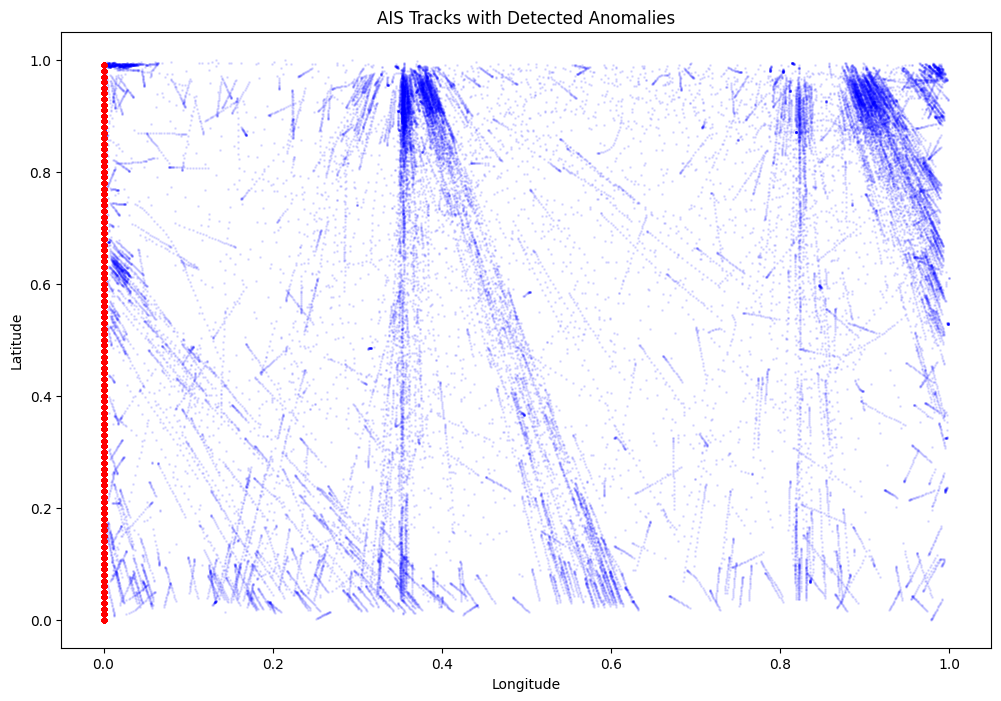

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Constants
LAT_BINS = 100
LON_BINS = 100
SOG_BINS = 30
COG_BINS = 72
SEQUENCE_LENGTH = 24  # Assuming 24 time steps per sequence

# Load and preprocess data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    scaler = MinMaxScaler()
    df[['LAT', 'LON', 'SOG', 'COG']] = scaler.fit_transform(df[['LAT', 'LON', 'SOG', 'COG']])
    return df, scaler

# Create four-hot vector representation
def create_four_hot_vector(lat, lon, sog, cog):
    lat_vec = tf.one_hot(tf.cast(lat * LAT_BINS, tf.int32), LAT_BINS)
    lon_vec = tf.one_hot(tf.cast(lon * LON_BINS, tf.int32), LON_BINS)
    sog_vec = tf.one_hot(tf.cast(sog * SOG_BINS, tf.int32), SOG_BINS)
    cog_vec = tf.one_hot(tf.cast(cog * COG_BINS, tf.int32), COG_BINS)
    return tf.concat([lat_vec, lon_vec, sog_vec, cog_vec], axis=-1)

# Create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

# GeoTrackNet model
class GeoTrackNet(keras.Model):
    def __init__(self, hidden_size, latent_size):
        super(GeoTrackNet, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.LSTM(hidden_size, return_sequences=True),
            keras.layers.LSTM(hidden_size),
            keras.layers.Dense(latent_size * 2)
        ])
        self.decoder = keras.Sequential([
            keras.layers.RepeatVector(SEQUENCE_LENGTH),
            keras.layers.LSTM(hidden_size, return_sequences=True),
            keras.layers.TimeDistributed(keras.layers.Dense(LAT_BINS + LON_BINS + SOG_BINS + COG_BINS))
        ])

    def call(self, inputs):
        z_params = self.encoder(inputs)
        z_mean, z_log_var = tf.split(z_params, num_or_size_splits=2, axis=-1)
        z = z_mean + tf.exp(0.5 * z_log_var) * tf.random.normal(tf.shape(z_mean))
        reconstructed = self.decoder(z)
        return reconstructed, z_mean, z_log_var

# Loss function
def loss_function(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = tf.reduce_mean(tf.square(inputs - outputs))
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    return reconstruction_loss + kl_loss

# Training function
@tf.function
def train_step(model, optimizer, inputs):
    with tf.GradientTape() as tape:
        outputs, z_mean, z_log_var = model(inputs)
        loss = loss_function(inputs, outputs, z_mean, z_log_var)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# A contrario detection
def a_contrario_detection(model, test_data, epsilon=1e-9):
    reconstructed, _, _ = model(test_data)
    errors = tf.reduce_mean(tf.square(test_data - reconstructed), axis=(1, 2))
    
    # Compute NFA (Number of False Alarms)
    sorted_errors = tf.sort(errors, direction='DESCENDING')
    nfa = tf.cumsum(tf.range(1, len(errors) + 1, dtype=tf.float32)) * epsilon
    
    # Find the maximum index where NFA < 1
    threshold_index = tf.reduce_max(tf.where(nfa < 1))
    threshold = sorted_errors[threshold_index]
    
    # Detect anomalies
    anomalies = errors > threshold
    return anomalies

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    df = load_data("/kaggle/input/dataset-123/this_is_my_sister_work.csv")
    df, scaler = preprocess_data(df)

    # Create sequences
    data = df[['LAT', 'LON', 'SOG', 'COG']].values
    sequences = create_sequences(data, SEQUENCE_LENGTH)

    # Create four-hot vector representations
    four_hot_sequences = np.apply_along_axis(
        lambda x: create_four_hot_vector(*x).numpy(),
        axis=2, arr=sequences
    )

    # Split data
    train_data, test_data = train_test_split(four_hot_sequences, test_size=0.2, random_state=42)

    # Create TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices(train_data).batch(32)
    test_dataset = tf.data.Dataset.from_tensor_slices(test_data).batch(32)

    # Create and train model
    model = GeoTrackNet(hidden_size=128, latent_size=64)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)

    # Training loop
    epochs = 50
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_dataset:
            loss = train_step(model, optimizer, batch)
            total_loss += loss
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_dataset):.4f}")

    # Detect anomalies
    anomalies = []
    for batch in test_dataset:
        batch_anomalies = a_contrario_detection(model, batch)
        anomalies.extend(batch_anomalies.numpy())

    # Visualize results
    plt.figure(figsize=(12, 8))
    plt.scatter(df['LON'], df['LAT'], c='blue', alpha=0.1, s=1)
    anomaly_sequences = test_data[anomalies]
    anomaly_points = anomaly_sequences.reshape(-1, anomaly_sequences.shape[-1])
    plt.scatter(anomaly_points[:, LON_BINS:LON_BINS+1].argmax(axis=1) / LON_BINS, 
                anomaly_points[:, :LAT_BINS].argmax(axis=1) / LAT_BINS, 
                c='red', s=10)
    plt.title("AIS Tracks with Detected Anomalies")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()